# Mobile Price Classification

The task is to build a predictive model that can accurately classify mobile phones into predefined price
ranges based on various attributes such as battery power, camera features, memory, connectivity options,
and more. The dataset provided contains information about several mobile phones, including their
specifications and corresponding price ranges.

## Attributes:

1. battery_power: Total energy a battery can store in mAh.
2. blue: Bluetooth enabled (1 if yes, 0 if no).
3. clock_speed: Speed at which microprocessor executes instructions.
4. dual_sim: Dual SIM support (1 if yes, 0 if no).
5. fc: Front Camera mega pixels.
6. four_g: 4G network support (1 if yes, 0 if no).
7. int_memory: Internal Memory (in gigabytes).
8. m_dep: Mobile Depth in cm.
9. mobile_wt: Weight of mobile phone.
10. n_cores: Number of cores of the processor.
11. pc: Primary Camera mega pixels.
12. px_height: Pixel Resolution Height.
13. px_width: Pixel Resolution Width.
14. ram: Random Access Memory in megabytes.
15. sc_h: Screen Height of mobile in cm.
16. sc_w: Screen Width of mobile in cm.
17. talk_time: Longest time that a single battery charge will last when you are talking.
18. three_g: 3G network support (1 if yes, 0 if no).
19. touch_screen: Touch screen support (1 if yes, 0 if no).
20. wifi: Wifi connectivity (1 if yes, 0 if no).
21. price_range: Price range of the mobile phone (0 - low cost, 1 - medium cost, 2 - high cost, 3 - very high cost).

## Importing the Libraries

In [1]:
pip install pydotplus

In [2]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import 'stats'
import scipy.stats
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import function to perform logistic regression
from sklearn.linear_model import LogisticRegression


# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

import os
os.getcwd()
# os.chdir("C:\Users\HP")
# os.getcwd()

pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

import statsmodels.stats.api as sms
import statsmodels.tsa.api as smt

from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor


# import various functions from scipy
from scipy import stats

# functions for forward selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# functions for linear regression
from sklearn.linear_model import LinearRegression

# functions for  cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image  

## Importing & Loading the Dataset

In [5]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Concatenate train and test datasets
mdf = pd.concat([train_df, test_df], ignore_index=True)

# Display the combined dataset
mdf.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,id
0,842,0,2.200000,0,1,0,7,0.600000,188,2,2,20,756,2549,9,7,19,0,0,1,1.000000,NaN
1,1021,1,0.500000,1,0,1,53,0.700000,136,3,6,905,1988,2631,17,3,7,1,1,0,2.000000,NaN
2,563,1,0.500000,1,2,1,41,0.900000,145,5,6,1263,1716,2603,11,2,9,1,1,0,2.000000,NaN
3,615,1,2.500000,0,0,0,10,0.800000,131,6,9,1216,1786,2769,16,8,11,1,0,0,2.000000,NaN
4,1821,1,1.200000,0,13,1,44,0.600000,141,2,14,1208,1212,1411,8,2,15,1,1,0,1.000000,NaN


## Data Preprocessing

In [6]:
mdf.drop('id',axis = 1,inplace = True)
mdf.head()
mdf.shape

(3000, 21)

In [7]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  3000 non-null   int64  
 1   blue           3000 non-null   int64  
 2   clock_speed    3000 non-null   float64
 3   dual_sim       3000 non-null   int64  
 4   fc             3000 non-null   int64  
 5   four_g         3000 non-null   int64  
 6   int_memory     3000 non-null   int64  
 7   m_dep          3000 non-null   float64
 8   mobile_wt      3000 non-null   int64  
 9   n_cores        3000 non-null   int64  
 10  pc             3000 non-null   int64  
 11  px_height      3000 non-null   int64  
 12  px_width       3000 non-null   int64  
 13  ram            3000 non-null   int64  
 14  sc_h           3000 non-null   int64  
 15  sc_w           3000 non-null   int64  
 16  talk_time      3000 non-null   int64  
 17  three_g        3000 non-null   int64  
 18  touch_sc

In [8]:
mdf.price_range.value_counts(normalize = True).mul(100).round(1).astype(str) + '%'

1.000000    25.0%
2.000000    25.0%
3.000000    25.0%
0.000000    25.0%
Name: price_range, dtype: object

In [9]:
mdf.isnull().sum()

battery_power       0
blue                0
clock_speed         0
dual_sim            0
fc                  0
four_g              0
int_memory          0
m_dep               0
mobile_wt           0
n_cores             0
pc                  0
px_height           0
px_width            0
ram                 0
sc_h                0
sc_w                0
talk_time           0
three_g             0
touch_screen        0
wifi                0
price_range      1000
dtype: int64

The test dataset does not have the 'price_range' column, hence it is showing as null.

In [10]:
from sklearn.impute import SimpleImputer
im = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
im.fit(mdf.iloc[:,:])

SimpleImputer(strategy='most_frequent')

In [11]:
mdf_trans = im.transform(mdf)
mdf= pd.DataFrame(mdf_trans,columns=mdf.columns)
mdf.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [12]:
mdf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
battery_power,3000.000000,1241.849000,437.063804,500.000000,863.750000,1232.000000,1619.000000,1999.000000
blue,3000.000000,0.502000,0.500079,0.000000,0.000000,1.000000,1.000000,1.000000
clock_speed,3000.000000,1.528467,0.820358,0.500000,0.700000,1.500000,2.300000,3.000000
dual_sim,3000.000000,0.512000,0.499939,0.000000,0.000000,1.000000,1.000000,1.000000
fc,3000.000000,4.404000,4.383742,0.000000,1.000000,3.000000,7.000000,19.000000
four_g,3000.000000,0.510000,0.499983,0.000000,0.000000,1.000000,1.000000,1.000000
int_memory,3000.000000,32.581667,18.152810,2.000000,16.000000,33.000000,48.000000,64.000000
m_dep,3000.000000,0.507000,0.285969,0.100000,0.200000,0.500000,0.800000,1.000000
mobile_wt,3000.000000,140.003000,35.213809,80.000000,109.000000,140.000000,170.000000,200.000000
n_cores,3000.000000,4.456333,2.289361,1.000000,2.000000,4.000000,6.000000,8.000000


## Univariate Analysis

AxesSubplot(0.125,0.653529;0.227941x0.226471)
AxesSubplot(0.398529,0.653529;0.227941x0.226471)
AxesSubplot(0.672059,0.653529;0.227941x0.226471)
AxesSubplot(0.125,0.381765;0.227941x0.226471)
AxesSubplot(0.398529,0.381765;0.227941x0.226471)
AxesSubplot(0.672059,0.381765;0.227941x0.226471)


Text(0.5, 1.0, 'Wifi facility')

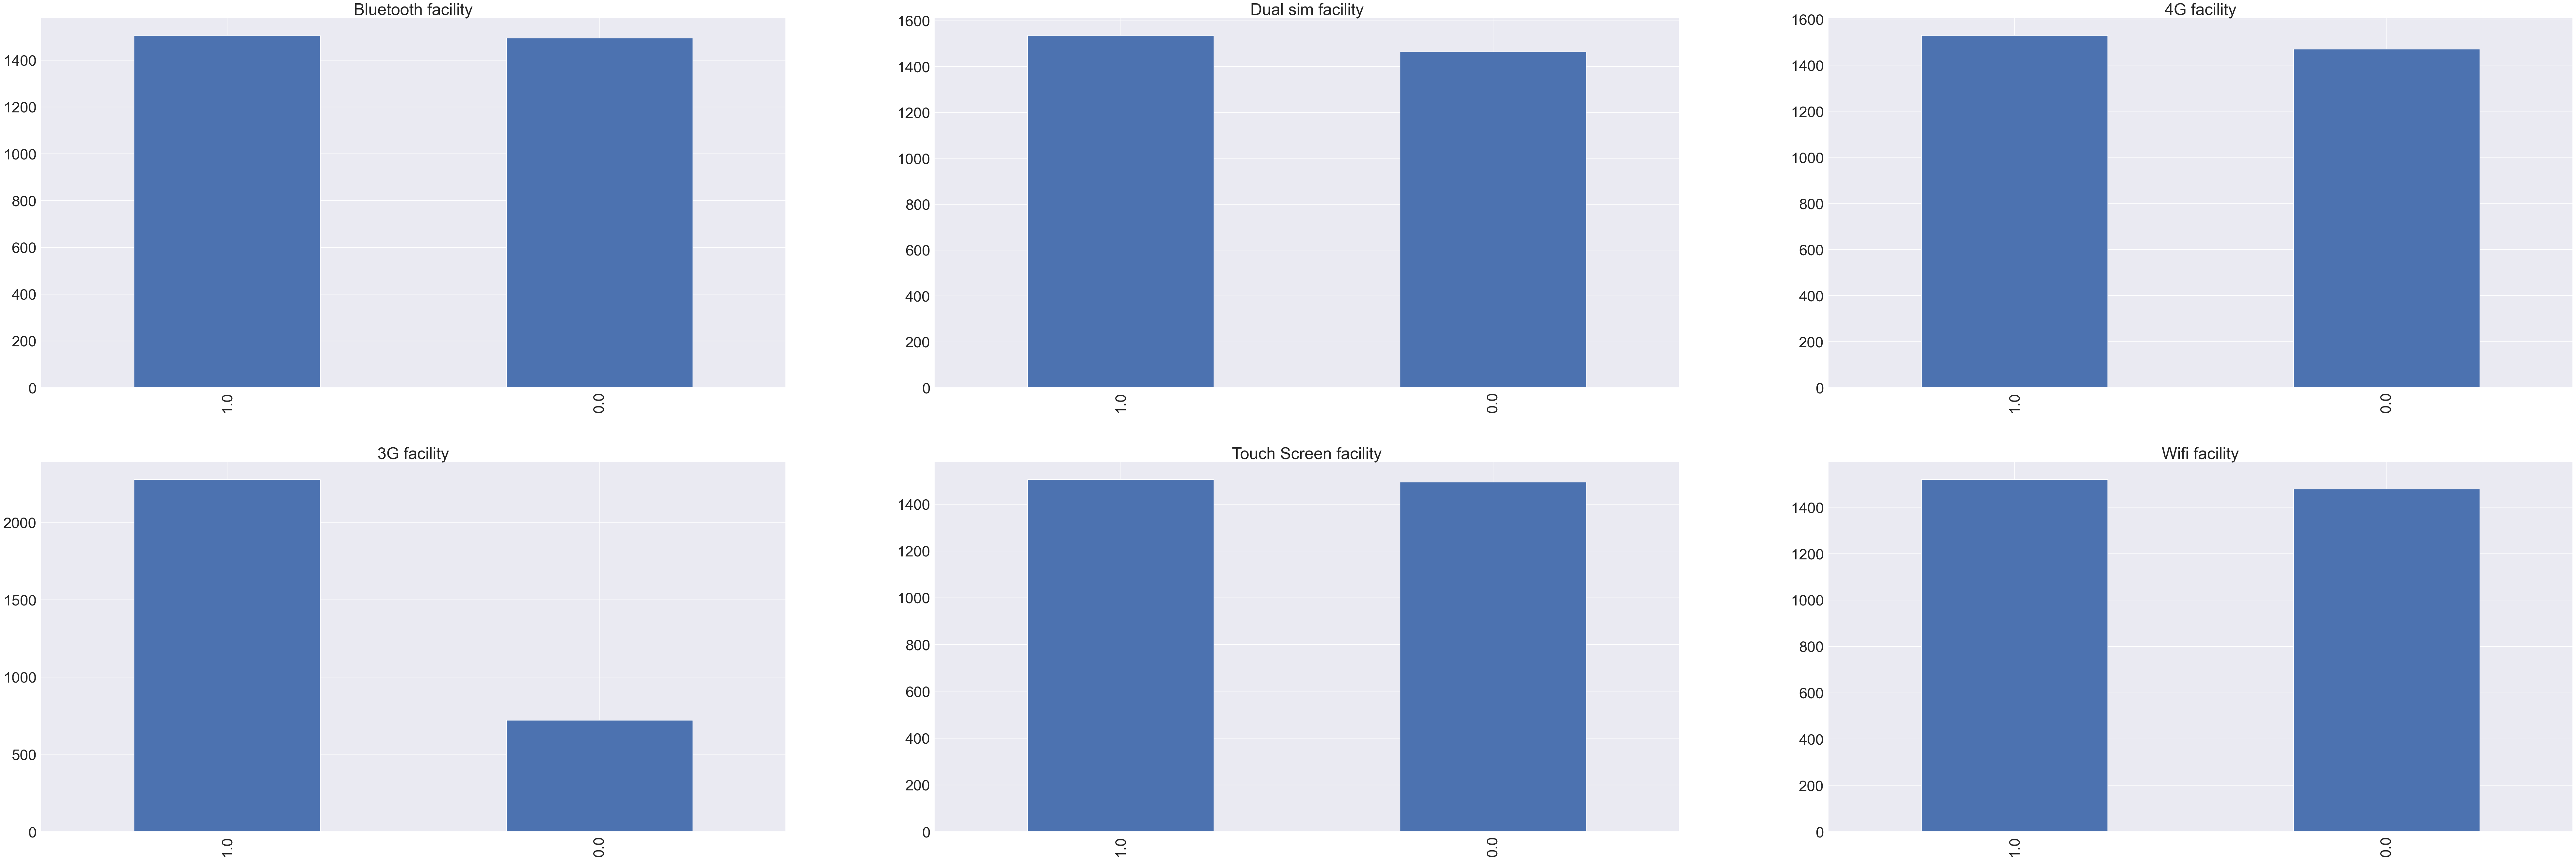

In [13]:
#plotting 'bar graphs' for individual categorial variables

plt.figure(figsize = (100,50))
sns.set(font_scale = 3)
plt.subplot(331)
print(mdf['blue'].value_counts().plot(kind="bar"))
plt.title('Bluetooth facility')
plt.subplot(332)
print(mdf['dual_sim'].value_counts().plot(kind="bar"))
plt.title('Dual sim facility')
plt.subplot(333)
print(mdf['four_g'].value_counts().plot(kind="bar"))
plt.title('4G facility')
plt.subplot(334)
print(mdf['three_g'].value_counts().plot(kind="bar"))
plt.title('3G facility')
plt.subplot(335)
print(mdf['touch_screen'].value_counts().plot(kind="bar"))
plt.title('Touch Screen facility')
plt.subplot(336)
print(mdf['wifi'].value_counts().plot(kind="bar"))
plt.title('Wifi facility')

From the bar plots, it is deciphered, that most of phones have ‘dual sim’ and ‘wifi’ facilities as well as ‘3G’ and ‘4G’ connectivity.


AxesSubplot(0.125,0.11;0.775x0.77)


Text(0.5, 1.0, 'Price Range')

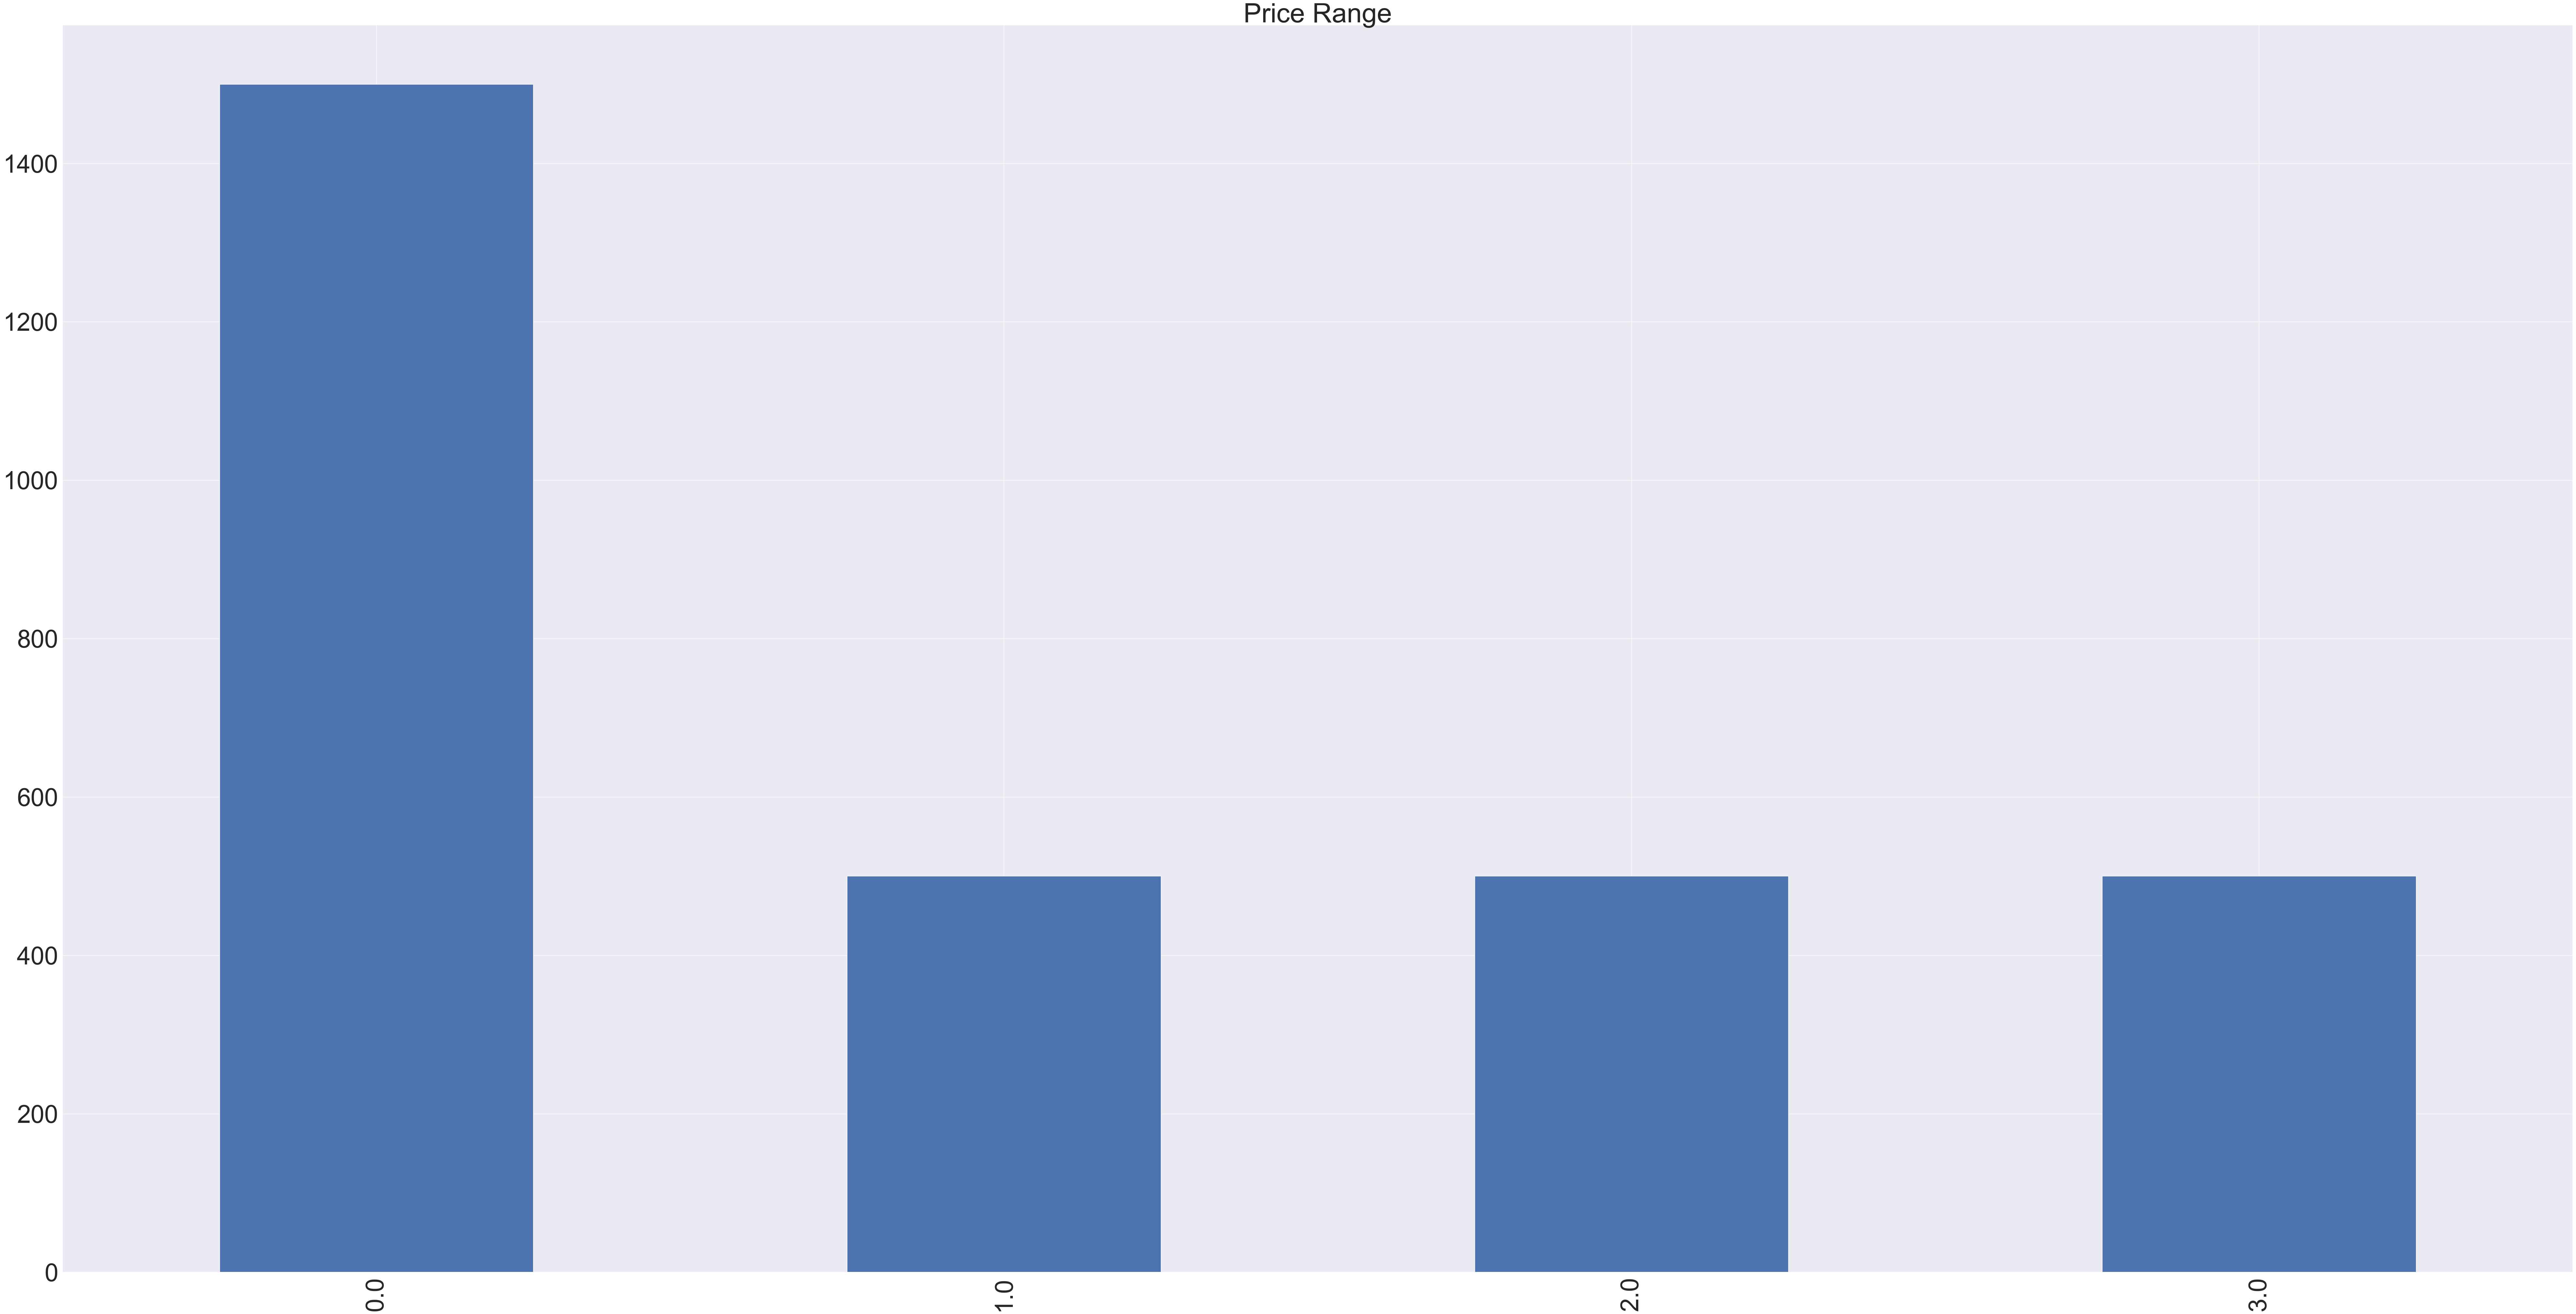

In [14]:
plt.figure(figsize = (100,50))
sns.set(font_scale = 5)
print(mdf['price_range'].value_counts().plot(kind="bar"))
plt.title('Price Range')

As provided, ‘0’ represents ‘low cost’, ‘1’ represents ‘ medium cost’, ‘2’ represents ‘high cost’ and ‘3’ represents ‘very high cost’, the inference is that ‘low cost’ phones are best sellers.


## Multivariate Analysis

<AxesSubplot:xlabel='wifi', ylabel='count'>

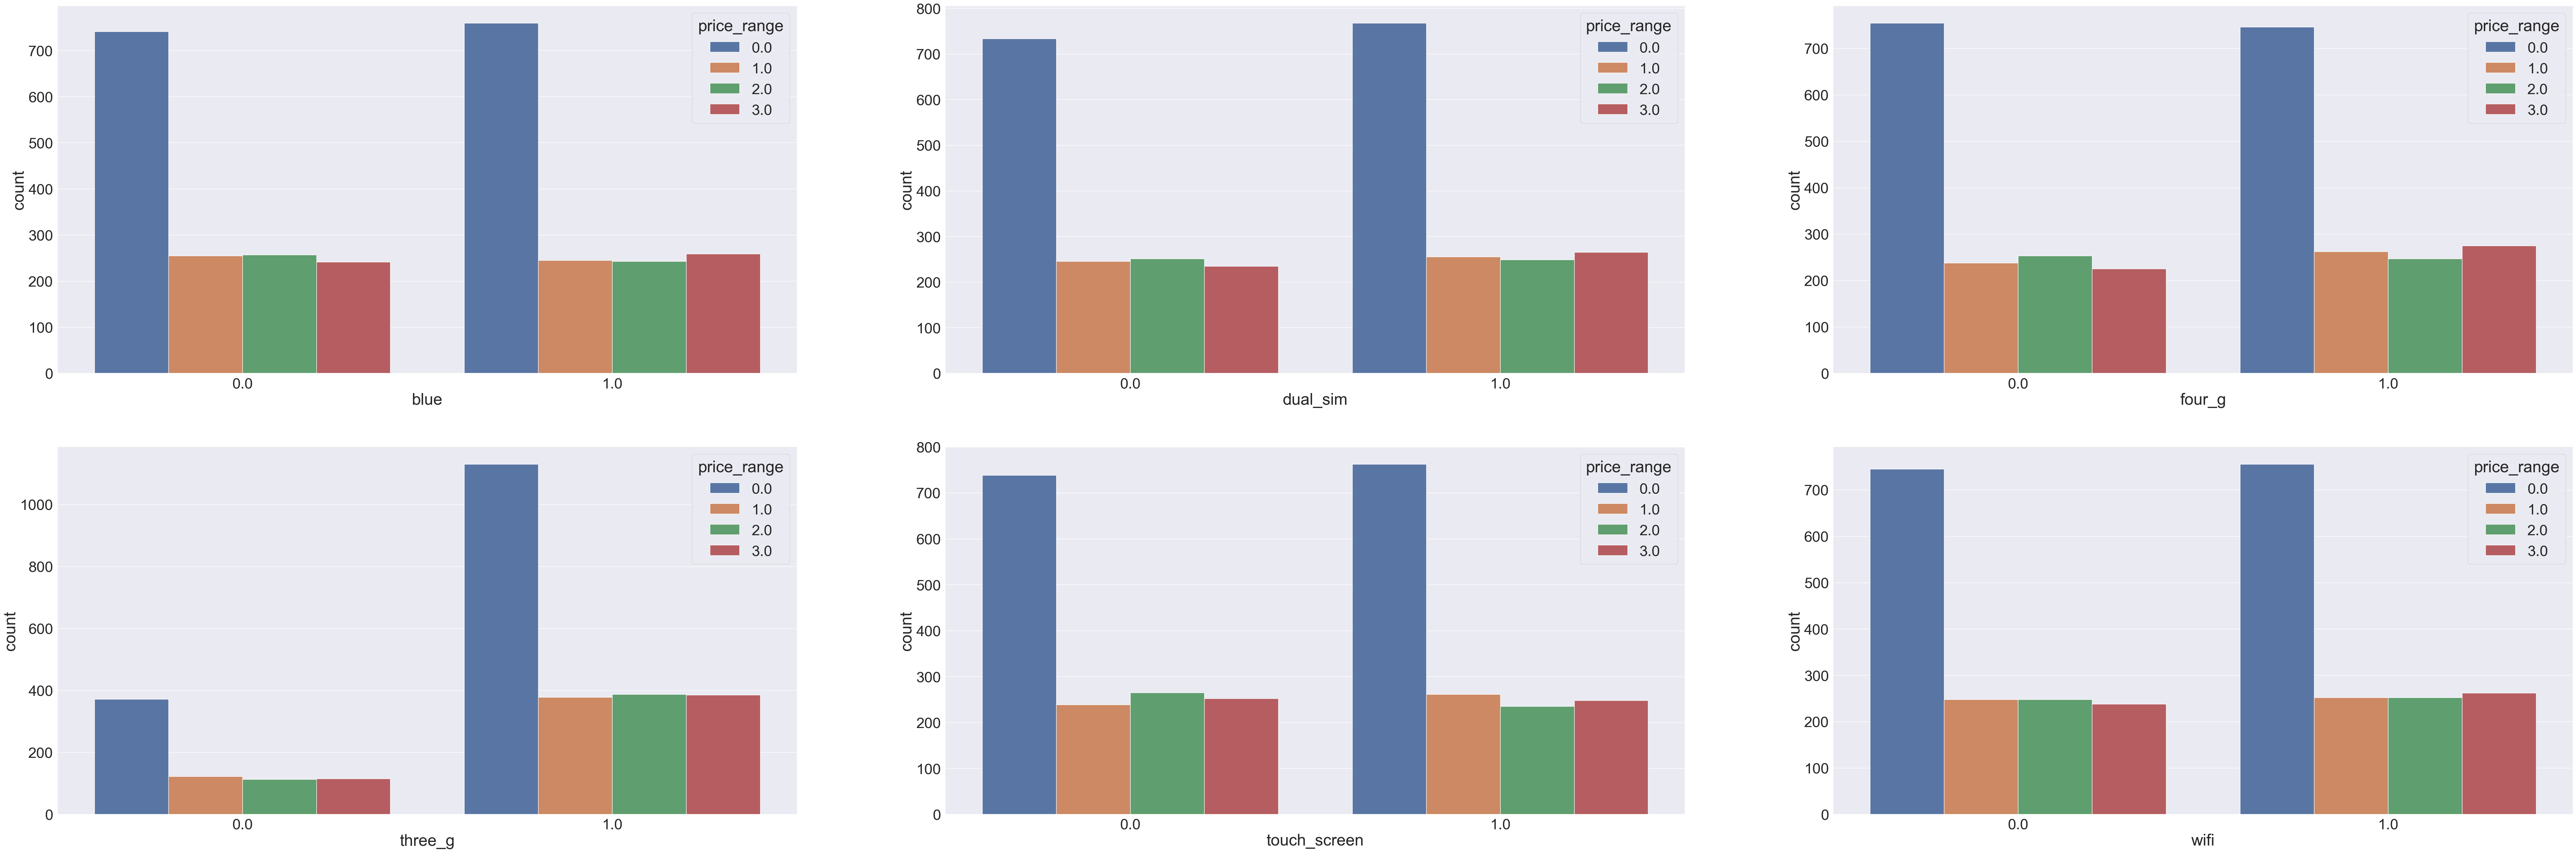

In [15]:
#plotting count plots

plt.figure(figsize = (100,50))
sns.set(font_scale = 3)
plt.subplot(331)
sns.countplot(mdf['blue'], hue = mdf['price_range'])
plt.subplot(332)
sns.countplot(mdf['dual_sim'], hue = mdf['price_range'])
plt.subplot(333)
sns.countplot(mdf['four_g'], hue = mdf['price_range'])
plt.subplot(334)
sns.countplot(mdf['three_g'], hue = mdf['price_range'])
plt.subplot(335)
sns.countplot(mdf['touch_screen'], hue = mdf['price_range'])
plt.subplot(336)
sns.countplot(mdf['wifi'], hue = mdf['price_range'])

As inferred from the count plots, the properties are varied among the price distribution from ‘low cost’ to ‘very high cost’ where ‘low cost’ phones and ‘very high cost phones’ will tick mark the highest number of features.

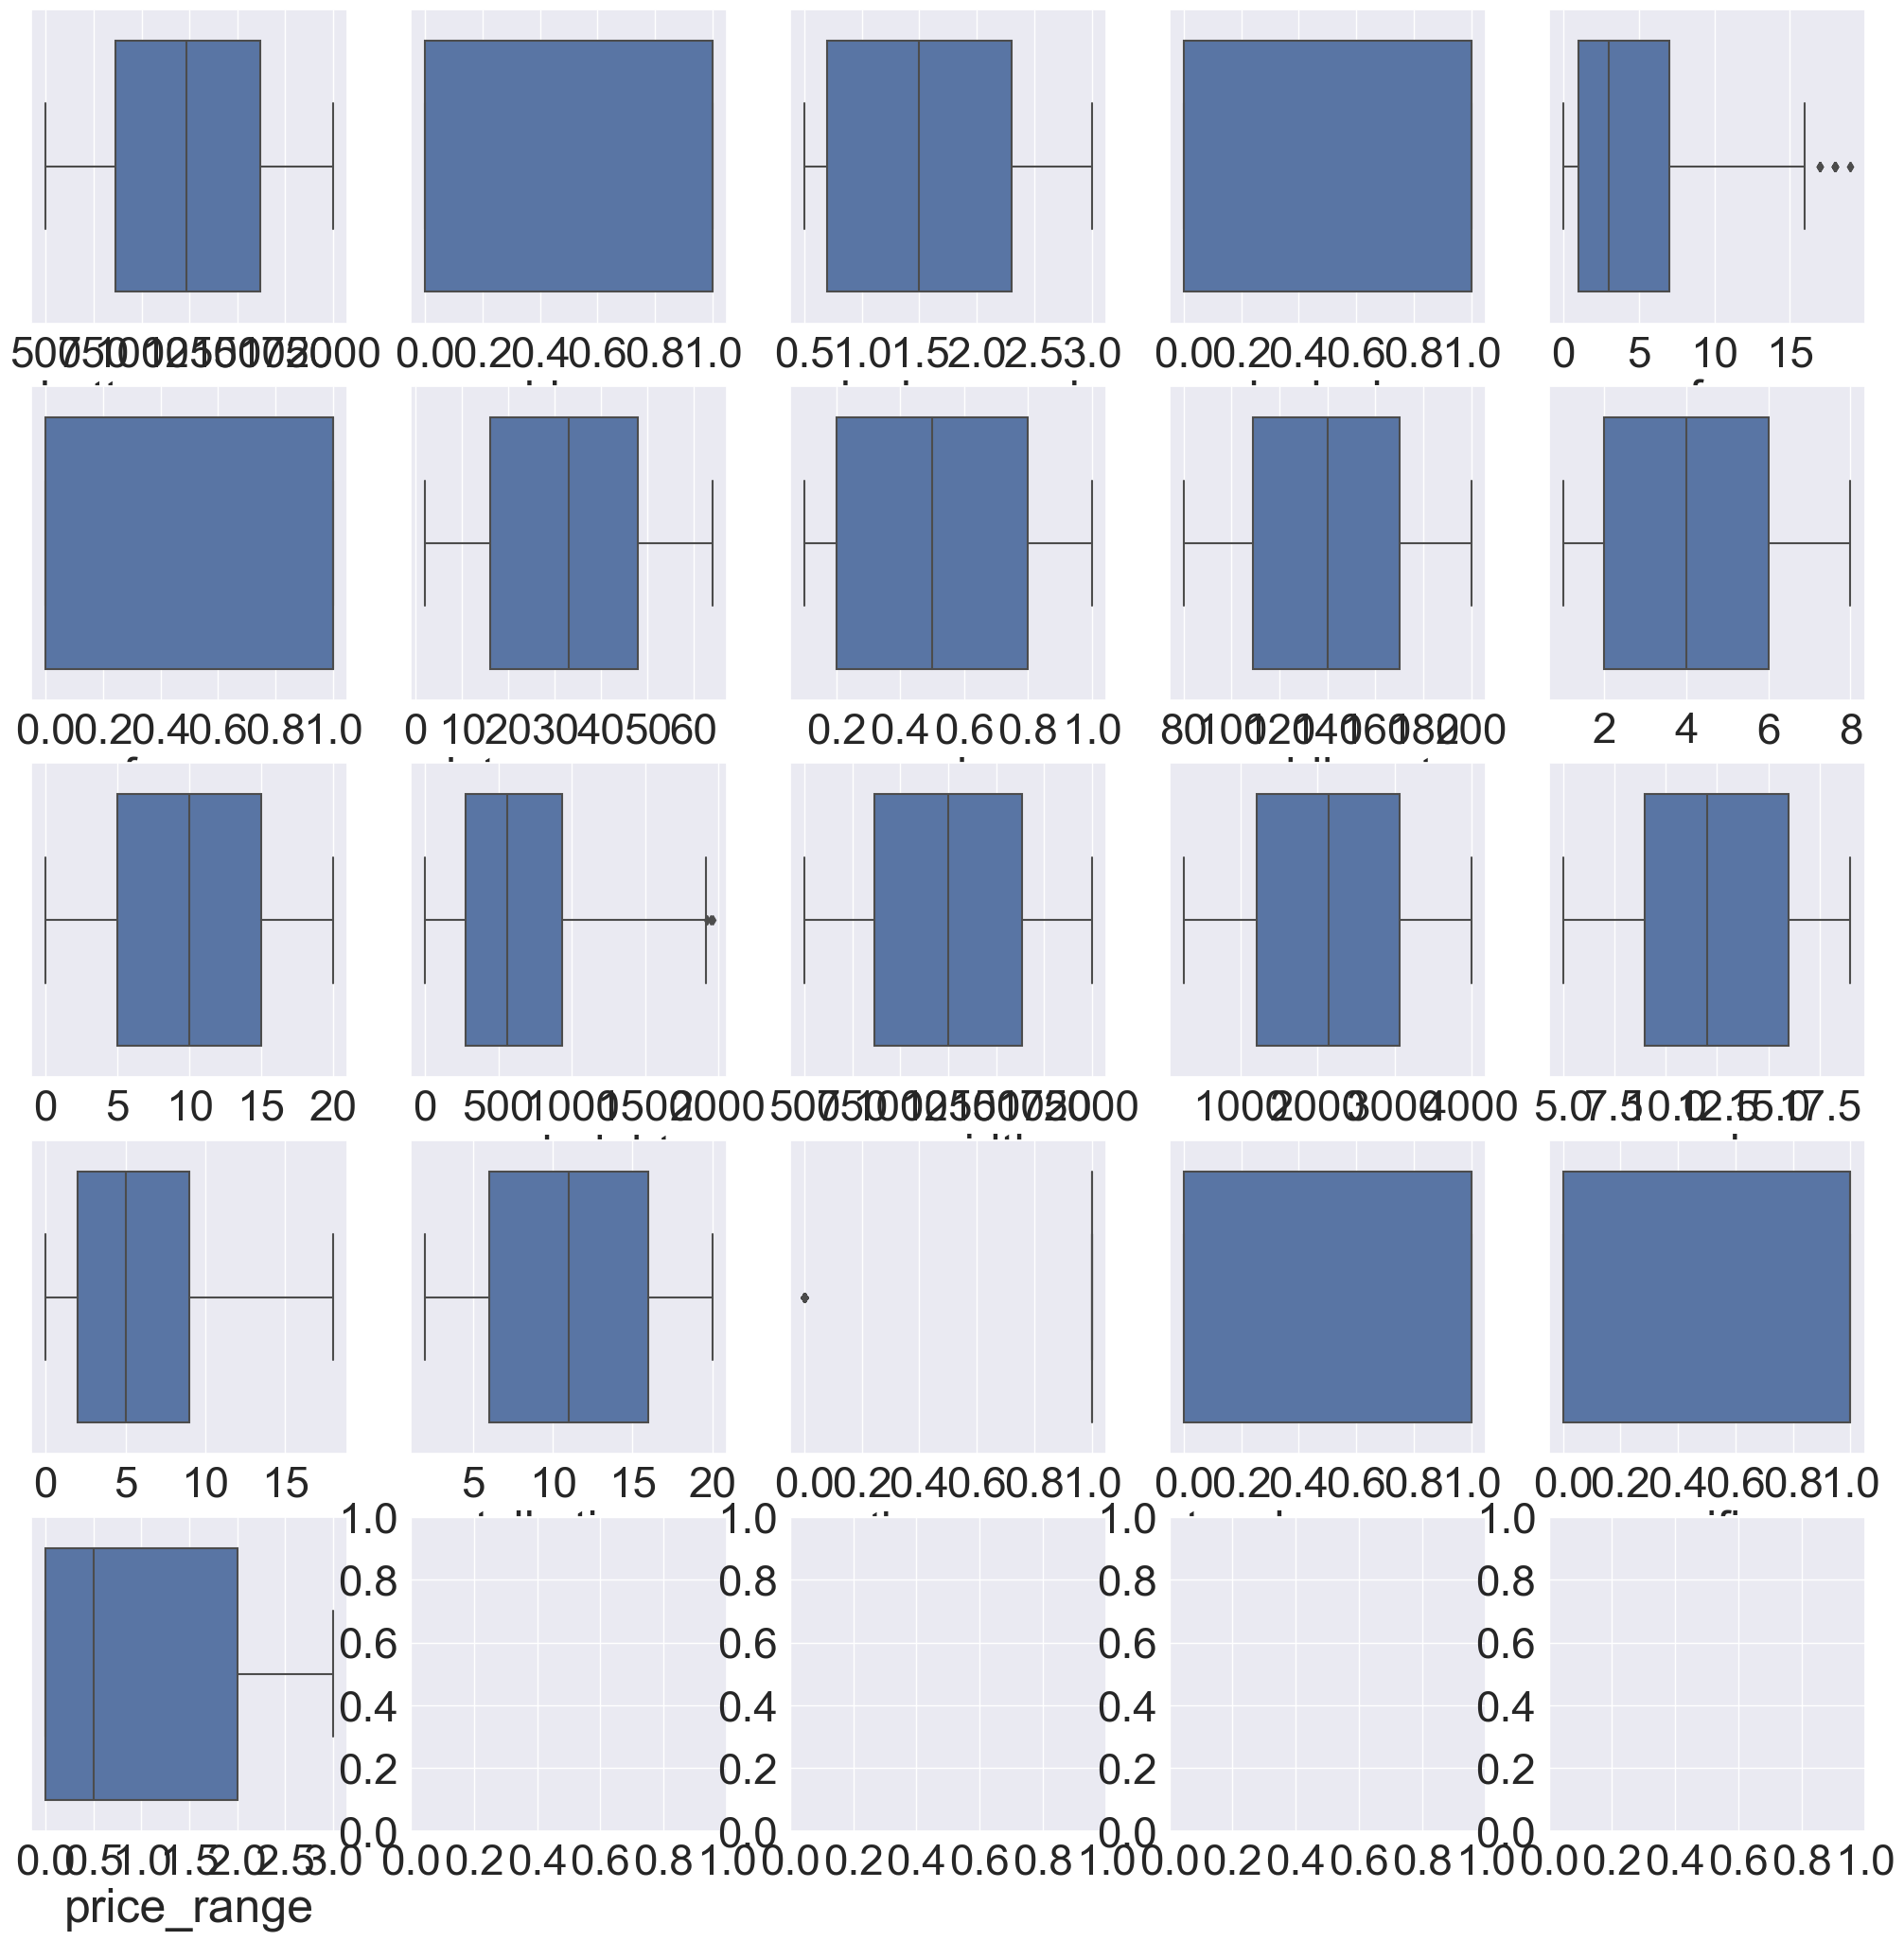

In [16]:
#using box plots for outlier detection

fig,ax = plt.subplots(5,5,figsize=(25,25))
sns.set(font_scale = 1)
for var,subplot in zip(mdf.columns,ax.flatten()):
    sns.set(font_scale = 1)
    sns.boxplot(mdf[var],ax=subplot)
    
plt.show()

In [17]:
# detecting and capping the outliers

for col in mdf.columns:
    percentiles = mdf[col].quantile([0.01,0.99]).values
    mdf[col][mdf[col] <= percentiles[0]] = percentiles[0]
    mdf[col][mdf[col] >= percentiles[1]] = percentiles[1]

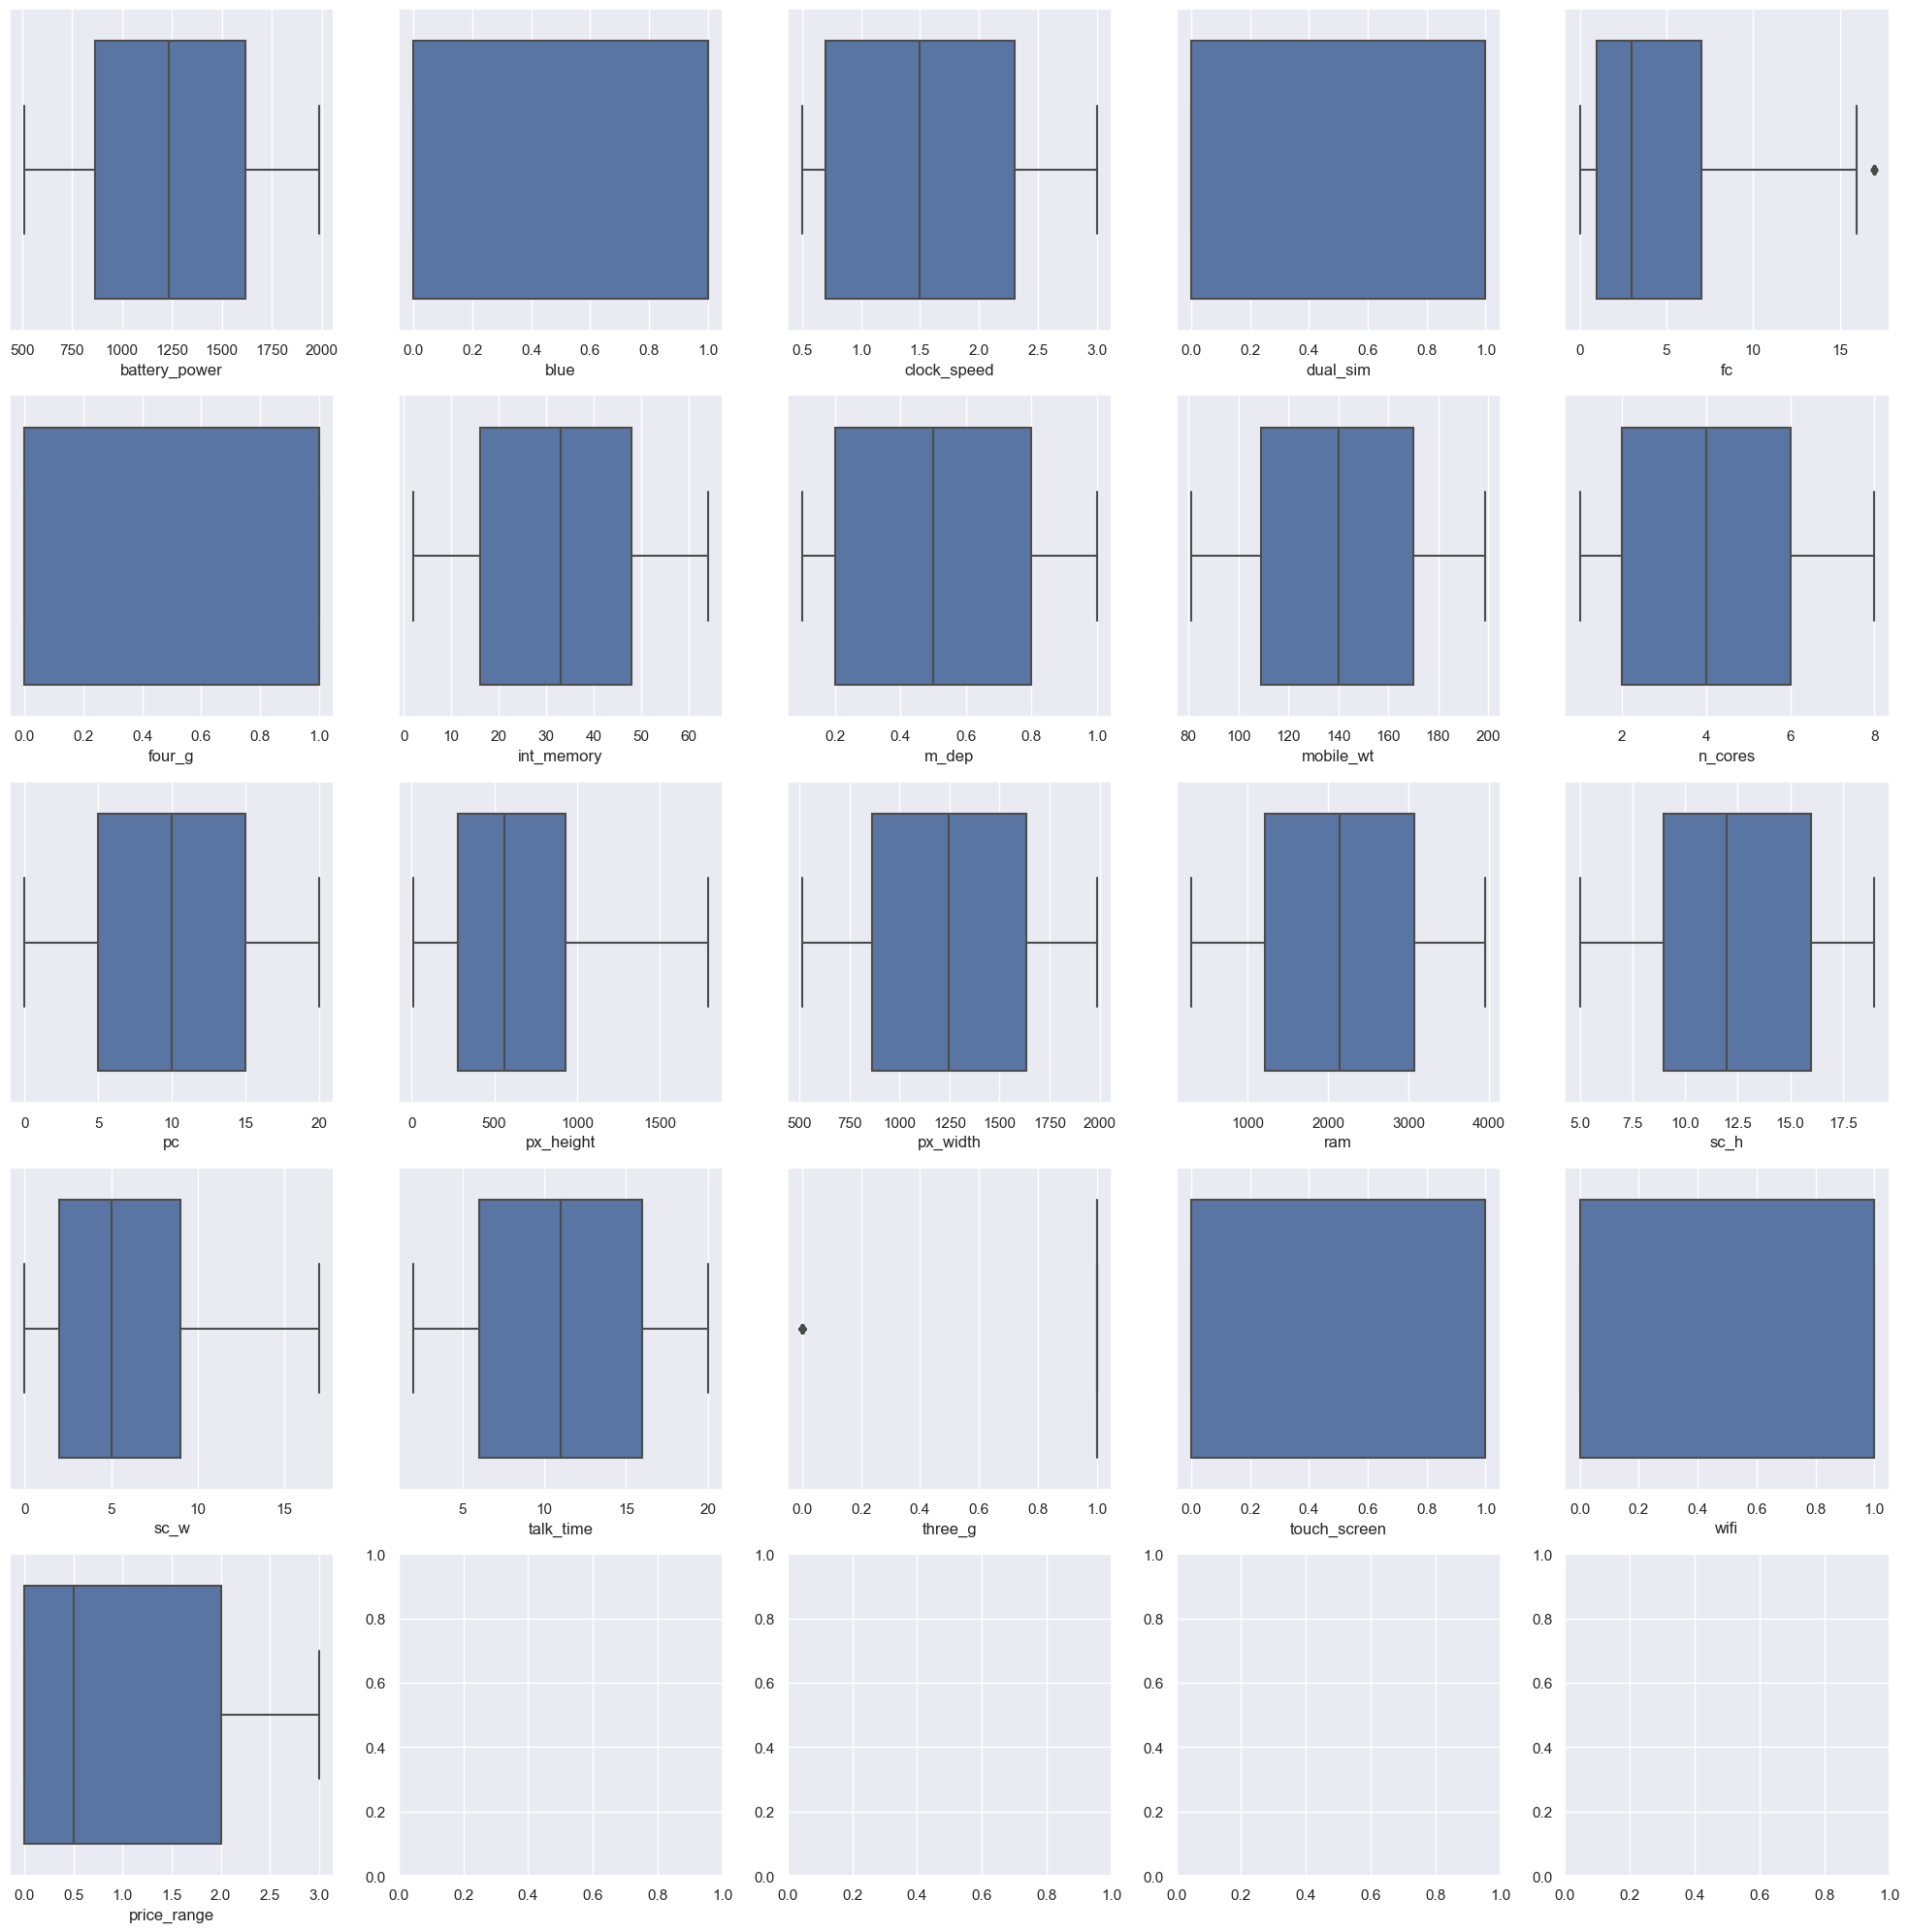

In [18]:
fig,ax = plt.subplots(5,5,figsize=(25,25))
sns.set(font_scale = 1)
for var,subplot in zip(mdf.columns,ax.flatten()):
    sns.set(font_scale = 1)
    sns.boxplot(mdf[var],ax=subplot)
    
plt.show()

In [19]:
#correlation matrix

mdf.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,-0.007676,-0.005270,-0.048107,0.019519,-0.003937,-0.000943,0.020411,-0.014172,-0.011936,0.025383,0.025777,0.012084,-0.011047,-0.038889,-0.022926,0.040316,0.018022,-0.010462,-0.005729,0.123688
blue,-0.007676,1.000000,0.026114,0.019910,-0.016051,0.007922,0.024133,0.009229,0.001809,0.024396,-0.014850,-0.024104,-0.038535,0.036915,0.001691,0.001056,-0.001305,-0.015693,-0.013350,-0.006057,0.001155
clock_speed,-0.005270,0.026114,1.000000,-0.004980,0.003654,-0.037196,-0.005467,-0.003707,0.003379,-0.008339,0.012682,-0.004139,0.017610,0.002152,-0.032997,-0.014191,-0.034143,-0.038021,0.033917,-0.032594,-0.010805
dual_sim,-0.048107,0.019910,-0.004980,1.000000,0.000043,0.010192,-0.014199,-0.007585,-0.006572,-0.017750,0.013381,-0.011767,0.014638,0.043482,-0.006008,-0.011998,-0.024706,-0.009127,-0.000096,0.025674,0.006930
fc,0.019519,-0.016051,0.003654,0.000043,1.000000,-0.001584,-0.020316,0.006345,0.021510,-0.002700,0.650334,-0.013511,0.006521,-0.006920,0.007811,-0.006812,-0.021507,-0.003440,-0.004572,-0.007316,-0.003844
four_g,-0.003937,0.007922,-0.037196,0.010192,-0.001584,1.000000,-0.008044,0.002775,-0.010874,0.003732,0.008524,-0.001738,0.017659,0.014933,0.013950,0.026477,-0.026627,0.573829,0.007922,-0.023620,0.029451
int_memory,-0.000943,0.024133,-0.005467,-0.014199,-0.020316,-0.008044,1.000000,0.004277,-0.026837,-0.013321,-0.014118,0.003019,-0.007407,0.019779,0.020374,0.013736,0.006348,-0.011804,-0.010725,0.008606,0.003133
m_dep,0.020411,0.009229,-0.003707,-0.007585,0.006345,0.002775,0.004277,1.000000,0.000822,-0.000093,0.022075,0.036731,0.026931,-0.000121,-0.026484,-0.021791,0.019500,-0.017879,0.011327,-0.032056,-0.015346
mobile_wt,-0.014172,0.001809,0.003379,-0.006572,0.021510,-0.010874,-0.026837,0.000822,1.000000,-0.025029,0.021585,0.004859,-0.004676,0.007830,-0.029543,-0.006471,-0.003203,0.003163,0.005050,0.022676,-0.013639
n_cores,-0.011936,0.024396,-0.008339,-0.017750,-0.002700,0.003732,-0.013321,-0.000093,-0.025029,1.000000,0.003587,-0.021986,-0.003320,-0.011268,-0.010362,0.023339,0.006603,0.007503,0.010416,-0.009054,0.027115


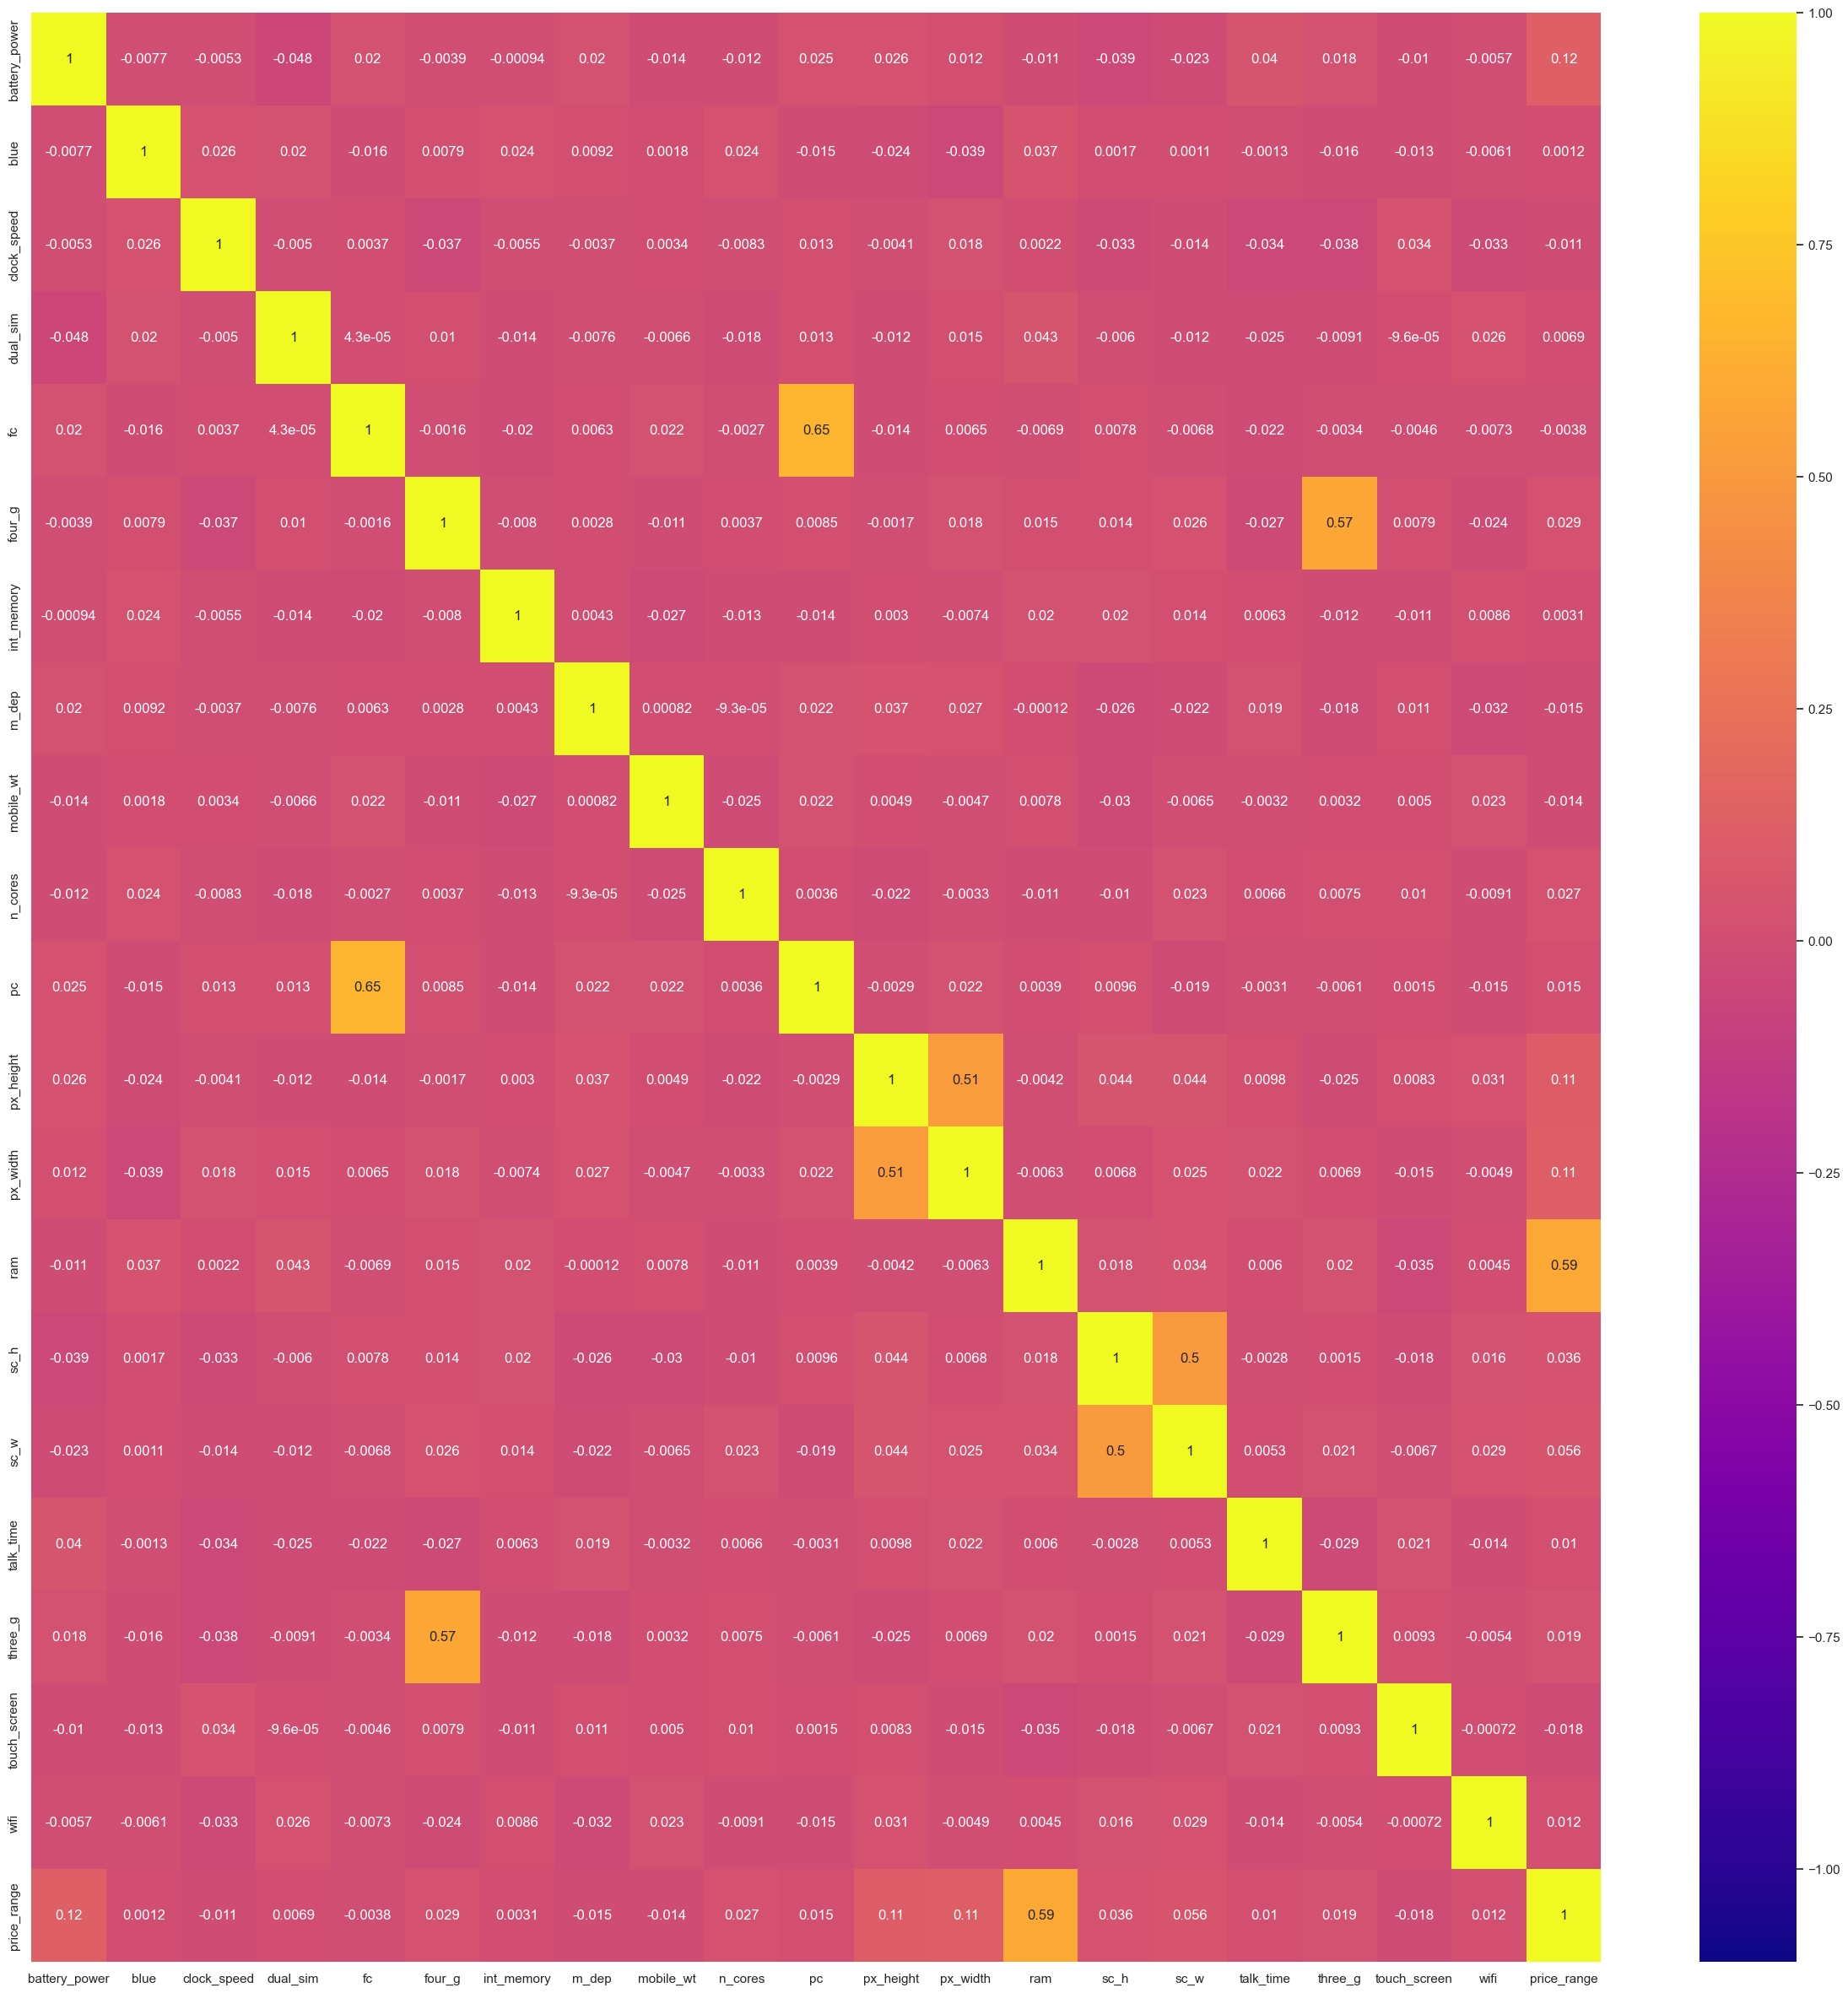

In [20]:
#heatmap 

plt.figure(figsize=(30,30))
sns.set(font_scale = 1)
sns.heatmap(mdf.corr(),cmap='plasma',annot=True,vmin=1.0,vmax=-1.0,annot_kws={"size":12})
plt.show()

The heatmap represents the correlation among attributes perfectly. The brighter color represents positive correlation while the darker shades represents negative correlation. In the case of mobile phones. The ‘battery power’,’ram’,’px_w and px_h’ represent positive correlation , which means the price of a mobile phones increases as these factors increase.


# SL Model Building

## Model 1 (Using Standard Scaling)

In [21]:
x_train = train_df.drop('price_range', axis=1)  # Features
y_train = train_df['price_range']  # Target variable

# Split train dataset into train and validation sets
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Display the shapes of train, validation, and test sets
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1600, 20)
X_test shape: (400, 20)
y_train shape: (1600,)
y_test shape: (400,)


In [22]:
#applying standard scaler to both train and test variables

X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(x_train)
X_test = X_scaler.transform(x_test)

In [23]:
#logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)
print('Intercept::', model.fit_intercept)
y_pred = model.predict(X_test)
print('R^2 score: ', r2_score(y_test,y_pred))
print('accuracy train :', model.score(X_train, y_train))
print('accuracy test :', model.score(X_test, y_test))
y_pred_proba = model.predict_proba(X_test)
auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print('AUC score:', auc_score)
precision = precision_score(y_test, y_pred, average = 'macro')
recall = recall_score(y_test, y_pred, average = 'macro')
f1 = f1_score(y_test, y_pred,average = 'macro')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Cohen Kappa Score:',cohen_kappa_score(y_test,model.predict(X_test)))
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
# Check for overfitting or underfitting
if train_mse < test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

Intercept:: True
R^2 score:  0.9812627939984729
accuracy train : 0.975625
accuracy test : 0.975
AUC score: 0.999592616116934
Precision: 0.9751
Recall: 0.9747
F1 Score: 0.9744
Cohen Kappa Score: 0.966584241128116
Training MSE: 0.024375
Test MSE: 0.025
The model is potentially underfitting.


In [24]:
#dtree  model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R^2 score: ', r2_score(y_test,y_pred))
print('accuracy train :', model.score(X_train, y_train))
print('accuracy test :', model.score(X_test, y_test))
y_pred_proba = model.predict_proba(X_test)
auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print('AUC score:', auc_score)
precision = precision_score(y_test, y_pred, average = 'macro')
recall = recall_score(y_test, y_pred, average = 'macro')
f1 = f1_score(y_test, y_pred,average = 'macro')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Cohen Kappa Score:',cohen_kappa_score(y_test,model.predict(X_test)))
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
# Check for overfitting or underfitting
if train_mse < test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

R^2 score:  0.8669658373891578
accuracy train : 1.0
accuracy test : 0.8225
AUC score: 0.8790510609367436
Precision: 0.8194
Recall: 0.8168
F1 Score: 0.8156
Cohen Kappa Score: 0.7627124308607524
Training MSE: 0.0
Test MSE: 0.1775
The model is potentially underfitting.


In [25]:
#KNN model

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R^2 score: ', r2_score(y_test,y_pred))
print('accuracy train :', model.score(X_train, y_train))
print('accuracy test :', model.score(X_test, y_test))
y_pred_proba = model.predict_proba(X_test)
auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print('AUC score:', auc_score)
precision = precision_score(y_test, y_pred, average = 'macro')
recall = recall_score(y_test, y_pred, average = 'macro')
f1 = f1_score(y_test, y_pred,average = 'macro')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Cohen Kappa Score:',cohen_kappa_score(y_test,model.predict(X_test)))
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
# Check for overfitting or underfitting
if train_mse < test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

R^2 score:  0.4659896289564781
accuracy train : 0.696875
accuracy test : 0.53
AUC score: 0.7628904466982005
Precision: 0.5514
Recall: 0.5221
F1 Score: 0.5282
Cohen Kappa Score: 0.37542565738110667
Training MSE: 0.4575
Test MSE: 0.7125
The model is potentially underfitting.


In [26]:
#GNB model

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R^2 score: ', r2_score(y_test,y_pred))
print('accuracy train :', model.score(X_train, y_train))
print('accuracy test :', model.score(X_test, y_test))
y_pred_proba = model.predict_proba(X_test)
auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print('AUC score:', auc_score)
precision = precision_score(y_test, y_pred, average = 'macro')
recall = recall_score(y_test, y_pred, average = 'macro')
f1 = f1_score(y_test, y_pred,average = 'macro')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Cohen Kappa Score:',cohen_kappa_score(y_test,model.predict(X_test)))
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
# Check for overfitting or underfitting
if train_mse < test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

R^2 score:  0.8482286313876306
accuracy train : 0.819375
accuracy test : 0.7975
AUC score: 0.9559696028765514
Precision: 0.7983
Recall: 0.7926
F1 Score: 0.7929
Cohen Kappa Score: 0.7296756107328795
Training MSE: 0.1825
Test MSE: 0.2025
The model is potentially underfitting.


In [27]:
#rf model

model = RandomForestClassifier(n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R^2 score: ', r2_score(y_test,y_pred))
print('accuracy train :', model.score(X_train, y_train))
print('accuracy test :', model.score(X_test, y_test))
y_pred_proba = model.predict_proba(X_test)
auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print('AUC score:', auc_score)
precision = precision_score(y_test, y_pred, average = 'macro')
recall = recall_score(y_test, y_pred, average = 'macro')
f1 = f1_score(y_test, y_pred,average = 'macro')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Cohen Kappa Score:',cohen_kappa_score(y_test,model.predict(X_test)))
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
# Check for overfitting or underfitting
if train_mse < test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

R^2 score:  0.923177455393739
accuracy train : 1.0
accuracy test : 0.8975
AUC score: 0.9824178452101275
Precision: 0.8943
Recall: 0.8944
F1 Score: 0.8942
Cohen Kappa Score: 0.862996533143979
Training MSE: 0.0
Test MSE: 0.1025
The model is potentially underfitting.


In [28]:
#support vector model

model = SVC(kernel='linear', probability = True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R^2 score: ', r2_score(y_test,y_pred))
print('accuracy train :', model.score(X_train, y_train))
print('accuracy test :', model.score(X_test, y_test))
y_pred_proba = model.predict_proba(X_test)
auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print('AUC score:', auc_score)
precision = precision_score(y_test, y_pred, average = 'macro')
recall = recall_score(y_test, y_pred, average = 'macro')
f1 = f1_score(y_test, y_pred,average = 'macro')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Cohen Kappa Score:',cohen_kappa_score(y_test,model.predict(X_test)))
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
# Check for overfitting or underfitting
if train_mse < test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

R^2 score:  0.9775153527981675
accuracy train : 0.9775
accuracy test : 0.97
AUC score: 0.9996739020730842
Precision: 0.9709
Recall: 0.9697
F1 Score: 0.9692
Cohen Kappa Score: 0.9599154884882294
Training MSE: 0.0225
Test MSE: 0.03
The model is potentially underfitting.


In [29]:
#model 1 classifocation report summary

models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'KNearestNeighbour': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Model': SVC()
}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print('-' * 50)

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       105
           1       0.85      0.87      0.86        91
           2       0.80      0.85      0.82        92
           3       0.94      0.88      0.91       112

    accuracy                           0.89       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.89      0.89      0.89       400

--------------------------------------------------
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       105
           1       0.94      1.00      0.97        91
           2       0.99      0.95      0.97        92
           3       0.97      0.99      0.98       112

    accuracy                           0.97       400
   macro avg       0.98      0.97      0.97       400
weighted avg       0.98      0.97      0.98   

## Model 2 (Using Robust Scaling)

In [30]:
#applying robust scaler to both train and test variables

scaler = RobustScaler()
Xr_train = scaler.fit_transform(x_train)
Xr_test = scaler.transform(x_test)

In [31]:
#logistic regression
model = LogisticRegression()
model.fit(Xr_train, y_train)
print('Intercept::', model.fit_intercept)
y_pred = model.predict(Xr_test)
print('R^2 score: ', r2_score(y_test,y_pred))
print('accuracy train :', model.score(Xr_train, y_train))
print('accuracy test :', model.score(Xr_test, y_test))
y_pred_proba = model.predict_proba(Xr_test)
auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print('AUC score:', auc_score)
precision = precision_score(y_test, y_pred, average = 'macro')
recall = recall_score(y_test, y_pred, average = 'macro')
f1 = f1_score(y_test, y_pred,average = 'macro')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Cohen Kappa Score:',cohen_kappa_score(y_test,model.predict(Xr_test)))
y_train_pred = model.predict(Xr_train)
y_test_pred = model.predict(Xr_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
# Check for overfitting or underfitting
if train_mse < test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

Intercept:: True
R^2 score:  0.9831365145986256
accuracy train : 0.9675
accuracy test : 0.9775
AUC score: 0.9991458369815632
Precision: 0.9775
Recall: 0.9763
F1 Score: 0.9767
Cohen Kappa Score: 0.9699119925782915
Training MSE: 0.0325
Test MSE: 0.0225
The model is potentially overfitting.


In [32]:
#dtree model

model = DecisionTreeClassifier()
model.fit(Xr_train, y_train)
y_pred = model.predict(Xr_test)
print('R^2 score: ', r2_score(y_test,y_pred))
print('accuracy train :', model.score(Xr_train, y_train))
print('accuracy test :', model.score(Xr_test, y_test))
y_pred_proba = model.predict_proba(Xr_test)
auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print('AUC score:', auc_score)
precision = precision_score(y_test, y_pred, average = 'macro')
recall = recall_score(y_test, y_pred, average = 'macro')
f1 = f1_score(y_test, y_pred,average = 'macro')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Cohen Kappa Score:',cohen_kappa_score(y_test,model.predict(Xr_test)))
y_train_pred = model.predict(Xr_train)
y_test_pred = model.predict(Xr_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
# Check for overfitting or underfitting
if train_mse < test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

R^2 score:  0.8707132785894631
accuracy train : 1.0
accuracy test : 0.8275
AUC score: 0.882449417698498
Precision: 0.8237
Recall: 0.8220
F1 Score: 0.8218
Cohen Kappa Score: 0.7693599739276492
Training MSE: 0.0
Test MSE: 0.1725
The model is potentially underfitting.


In [33]:
#KNN Model

model = KNeighborsClassifier(n_neighbors=5)
model.fit(Xr_train, y_train)
y_pred = model.predict(Xr_test)
print('R^2 score: ', r2_score(y_test,y_pred))
print('accuracy train :', model.score(Xr_train, y_train))
print('accuracy test :', model.score(Xr_test, y_test))
y_pred_proba = model.predict_proba(Xr_test)
auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print('AUC score:', auc_score)
precision = precision_score(y_test, y_pred, average = 'macro')
recall = recall_score(y_test, y_pred, average = 'macro')
f1 = f1_score(y_test, y_pred,average = 'macro')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Cohen Kappa Score:',cohen_kappa_score(y_test,model.predict(Xr_test)))
y_train_pred = model.predict(Xr_train)
y_test_pred = model.predict(Xr_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
# Check for overfitting or underfitting
if train_mse < test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

R^2 score:  0.4884742761583106
accuracy train : 0.711875
accuracy test : 0.5075
AUC score: 0.7729739111335394
Precision: 0.5240
Recall: 0.4986
F1 Score: 0.5062
Cohen Kappa Score: 0.34506890074635543
Training MSE: 0.386875
Test MSE: 0.6825
The model is potentially underfitting.


In [34]:
#Random Forest model

model = RandomForestClassifier(n_jobs=-1)
model.fit(Xr_train, y_train)
y_pred = model.predict(Xr_test)
print('R^2 score: ', r2_score(y_test,y_pred))
print('accuracy train :', model.score(Xr_train, y_train))
print('accuracy test :', model.score(Xr_test, y_test))
y_pred_proba = model.predict_proba(Xr_test)
auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print('AUC score:', auc_score)
precision = precision_score(y_test, y_pred, average = 'macro')
recall = recall_score(y_test, y_pred, average = 'macro')
f1 = f1_score(y_test, y_pred,average = 'macro')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Cohen Kappa Score:',cohen_kappa_score(y_test,model.predict(Xr_test)))
y_train_pred = model.predict(Xr_train)
y_test_pred = model.predict(Xr_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
# Check for overfitting or underfitting
if train_mse < test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

R^2 score:  0.9213037347935863
accuracy train : 1.0
accuracy test : 0.895
AUC score: 0.9826779025111267
Precision: 0.8915
Recall: 0.8920
F1 Score: 0.8917
Cohen Kappa Score: 0.8597042097088028
Training MSE: 0.0
Test MSE: 0.105
The model is potentially underfitting.


In [35]:
#NB Model

model = GaussianNB()
model.fit(Xr_train, y_train)
y_pred = model.predict(Xr_test)
print('R^2 score: ', r2_score(y_test,y_pred))
print('accuracy train :', model.score(Xr_train, y_train))
print('accuracy test :', model.score(Xr_test, y_test))
y_pred_proba = model.predict_proba(Xr_test)
auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print('AUC score:', auc_score)
precision = precision_score(y_test, y_pred, average = 'macro')
recall = recall_score(y_test, y_pred, average = 'macro')
f1 = f1_score(y_test, y_pred,average = 'macro')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Cohen Kappa Score:',cohen_kappa_score(y_test,model.predict(Xr_test)))
y_train_pred = model.predict(Xr_train)
y_test_pred = model.predict(Xr_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
# Check for overfitting or underfitting
if train_mse < test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

R^2 score:  0.9831365145986256
accuracy train : 0.9675
accuracy test : 0.9775
AUC score: 0.9991458369815632
Precision: 0.9775
Recall: 0.9763
F1 Score: 0.9767
Cohen Kappa Score: 0.9699119925782915
Training MSE: 0.0325
Test MSE: 0.0225
The model is potentially overfitting.


In [36]:
#SVM Model

model = SVC(kernel='linear', probability = True)
model.fit(Xr_train, y_train)
y_pred = model.predict(Xr_test)
print('R^2 score: ', r2_score(y_test,y_pred))
print('accuracy train :', model.score(Xr_train, y_train))
print('accuracy test :', model.score(Xr_test, y_test))
y_pred_proba = model.predict_proba(Xr_test)
auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print('AUC score:', auc_score)
precision = precision_score(y_test, y_pred, average = 'macro')
recall = recall_score(y_test, y_pred, average = 'macro')
f1 = f1_score(y_test, y_pred,average = 'macro')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Cohen Kappa Score:',cohen_kappa_score(y_test,model.predict(Xr_test)))
y_train_pred = model.predict(Xr_train)
y_test_pred = model.predict(Xr_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
# Check for overfitting or underfitting
if train_mse < test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

R^2 score:  0.9812627939984729
accuracy train : 0.96875
accuracy test : 0.975
AUC score: 0.9996003439872325
Precision: 0.9747
Recall: 0.9745
F1 Score: 0.9742
Cohen Kappa Score: 0.9665822869411932
Training MSE: 0.03125
Test MSE: 0.025
The model is potentially overfitting.


In [37]:
#classification report summary for Model 2

models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'KNearestNeighbour': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Model': SVC()
}
for model_name, model in models.items():
    model.fit(Xr_train, y_train)
    y_pred = model.predict(Xr_test)
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print('-' * 50)

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       105
           1       0.86      0.91      0.88        91
           2       0.85      0.87      0.86        92
           3       0.95      0.90      0.93       112

    accuracy                           0.91       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.91      0.91      0.91       400

--------------------------------------------------
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       105
           1       0.96      0.99      0.97        91
           2       0.99      0.93      0.96        92
           3       0.97      0.99      0.98       112

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98   

## Model 3 (Using Feature Selection)

In [90]:
#selecting features with correlation above 0.5
def correlation(dataset, threshold):
    col_corr = set()
    corr_mat = mdf.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if abs(corr_mat.iloc[i,j])>threshold:
                colname = corr_mat.columns[i]
                col_corr.add(colname)
    return(col_corr)
corr_features = correlation(Xr_train, 0.5)
len(set(corr_features))

5

In [39]:
corr_features

{'pc', 'price_range', 'px_width', 'sc_w', 'three_g'}

In [40]:
xprime = mdf[['pc','px_width', 'sc_w', 'three_g']]
yprime = mdf['price_range']
Xp_train, Xp_test, yp_train, yp_test = train_test_split(xprime, yprime, test_size=0.30, random_state=42)
xp_train = scaler.fit_transform(Xp_train)
xp_test = scaler.fit_transform(Xp_test)
#using logistic regression
model = LogisticRegression()
model.fit(xp_train, yp_train)
print('Intercept::', model.fit_intercept)
y_pred = model.predict(xp_test)
print('R^2 score: ', r2_score(yp_test,y_pred))
print('accuracy train :', model.score(xp_train, yp_train))
print('accuracy test :', model.score(xp_test, yp_test))
y_pred_proba = model.predict_proba(xp_test)
auc_score = roc_auc_score(yp_test, y_pred_proba, multi_class='ovr')
print('AUC score:', auc_score)
precision = precision_score(yp_test, y_pred, average = 'macro')
recall = recall_score(yp_test, y_pred, average = 'macro')
f1 = f1_score(yp_test, y_pred,average = 'macro')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Cohen Kappa Score:',cohen_kappa_score(yp_test,model.predict(xp_test)))
y_train_pred = model.predict(xp_train)
y_test_pred = model.predict(xp_test)
train_mse = mean_squared_error(yp_train, y_train_pred)
test_mse = mean_squared_error(yp_test, y_test_pred)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
# Check for overfitting or underfitting
if train_mse < test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

Intercept:: True
R^2 score:  -0.7239740166100166
accuracy train : 0.4957142857142857
accuracy test : 0.51
AUC score: 0.5298210735861507
Precision: 0.1275
Recall: 0.2500
F1 Score: 0.1689
Cohen Kappa Score: 0.0
Training MSE: 2.3642857142857143
Test MSE: 2.261111111111111
The model is potentially overfitting.


In [41]:
#dtree model
model = DecisionTreeClassifier()
model.fit(xp_train, yp_train)
y_pred = model.predict(xp_test)
print('R^2 score: ', r2_score(yp_test,y_pred))
print('accuracy train :', model.score(xp_train, yp_train))
print('accuracy test :', model.score(xp_test, yp_test))
y_pred_proba = model.predict_proba(xp_test)
auc_score = roc_auc_score(yp_test, y_pred_proba, multi_class='ovr')
print('AUC score:', auc_score)
precision = precision_score(yp_test, y_pred, average = 'macro')
recall = recall_score(yp_test, y_pred, average = 'macro')
f1 = f1_score(yp_test, y_pred,average = 'macro')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Cohen Kappa Score:',cohen_kappa_score(yp_test,model.predict(xp_test)))
y_train_pred = model.predict(xp_train)
y_test_pred = model.predict(xp_test)
train_mse = mean_squared_error(yp_train, y_train_pred)
test_mse = mean_squared_error(yp_test, y_test_pred)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
# Check for overfitting or underfitting
if train_mse < test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

R^2 score:  -1.05775571810601
accuracy train : 0.9995238095238095
accuracy test : 0.3233333333333333
AUC score: 0.4916132367388614
Precision: 0.2356
Recall: 0.2389
F1 Score: 0.2365
Cohen Kappa Score: -0.019779745436480978
Training MSE: 0.004285714285714286
Test MSE: 2.698888888888889
The model is potentially underfitting.


In [43]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(xp_train, yp_train)
y_pred = model.predict(xp_test)
print('R^2 score: ', r2_score(yp_test,y_pred))
print('accuracy train :', model.score(xp_train, yp_train))
print('accuracy test :', model.score(xp_test, yp_test))
y_pred_proba = model.predict_proba(xp_test)
auc_score = roc_auc_score(yp_test, y_pred_proba, multi_class='ovr')
print('AUC score:', auc_score)
precision = precision_score(yp_test, y_pred, average = 'macro')
recall = recall_score(yp_test, y_pred, average = 'macro')
f1 = f1_score(yp_test, y_pred,average = 'macro')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Cohen Kappa Score:',cohen_kappa_score(yp_test,model.predict(xp_test)))
y_train_pred = model.predict(xp_train)
y_test_pred = model.predict(xp_test)
train_mse = mean_squared_error(yp_train, y_train_pred)
test_mse = mean_squared_error(yp_test, y_test_pred)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
# Check for overfitting or underfitting
if train_mse < test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

R^2 score:  -0.8595198852378312
accuracy train : 0.5714285714285714
accuracy test : 0.41333333333333333
AUC score: 0.48720103713309254
Precision: 0.2224
Recall: 0.2340
F1 Score: 0.2119
Cohen Kappa Score: -0.030507533634620776
Training MSE: 1.7671428571428571
Test MSE: 2.438888888888889
The model is potentially underfitting.


In [44]:
#NB Model

model = GaussianNB()
model.fit(xp_train, yp_train)
y_pred = model.predict(xp_test)
print('R^2 score: ', r2_score(yp_test,y_pred))
print('accuracy train :', model.score(xp_train, yp_train))
print('accuracy test :', model.score(xp_test, yp_test))
y_pred_proba = model.predict_proba(xp_test)
auc_score = roc_auc_score(yp_test, y_pred_proba, multi_class='ovr')
print('AUC score:', auc_score)
precision = precision_score(yp_test, y_pred, average = 'macro')
recall = recall_score(yp_test, y_pred, average = 'macro')
f1 = f1_score(yp_test, y_pred,average = 'macro')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Cohen Kappa Score:',cohen_kappa_score(yp_test,model.predict(xp_test)))
y_train_pred = model.predict(xp_train)
y_test_pred = model.predict(xp_test)
train_mse = mean_squared_error(yp_train, y_train_pred)
test_mse = mean_squared_error(yp_test, y_test_pred)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
# Check for overfitting or underfitting
if train_mse < test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

R^2 score:  -0.7112665914261591
accuracy train : 0.4942857142857143
accuracy test : 0.5111111111111111
AUC score: 0.526814225832134
Precision: 0.2113
Recall: 0.2517
F1 Score: 0.1727
Cohen Kappa Score: 0.004644990046449804
Training MSE: 2.3785714285714286
Test MSE: 2.2444444444444445
The model is potentially overfitting.


In [45]:
#RF model

model = RandomForestClassifier(n_jobs=-1)
model.fit(xp_train, yp_train)
y_pred = model.predict(xp_test)
print('R^2 score: ', r2_score(yp_test,y_pred))
print('accuracy train :', model.score(xp_train, yp_train))
print('accuracy test :', model.score(xp_test, yp_test))
y_pred_proba = model.predict_proba(xp_test)
auc_score = roc_auc_score(yp_test, y_pred_proba, multi_class='ovr')
print('AUC score:', auc_score)
precision = precision_score(yp_test, y_pred, average = 'macro')
recall = recall_score(yp_test, y_pred, average = 'macro')
f1 = f1_score(yp_test, y_pred,average = 'macro')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Cohen Kappa Score:',cohen_kappa_score(yp_test,model.predict(xp_test)))
y_train_pred = model.predict(xp_train)
y_test_pred = model.predict(xp_test)
train_mse = mean_squared_error(yp_train, y_train_pred)
test_mse = mean_squared_error(yp_test, y_test_pred)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
# Check for overfitting or underfitting
if train_mse < test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

R^2 score:  -0.8883233823212418
accuracy train : 0.9995238095238095
accuracy test : 0.4111111111111111
AUC score: 0.48943500672533335
Precision: 0.2472
Recall: 0.2516
F1 Score: 0.2397
Cohen Kappa Score: 0.004811122748306862
Training MSE: 0.004285714285714286
Test MSE: 2.4766666666666666
The model is potentially underfitting.


In [46]:
#SVM Model

model = SVC(kernel='linear', probability = True)
model.fit(xp_train, yp_train)
y_pred = model.predict(xp_test)
print('R^2 score: ', r2_score(yp_test,y_pred))
print('accuracy train :', model.score(xp_train, yp_train))
print('accuracy test :', model.score(xp_test, yp_test))
y_pred_proba = model.predict_proba(xp_test)
auc_score = roc_auc_score(yp_test, y_pred_proba, multi_class='ovr')
print('AUC score:', auc_score)
precision = precision_score(yp_test, y_pred, average = 'macro')
recall = recall_score(yp_test, y_pred, average = 'macro')
f1 = f1_score(yp_test, y_pred,average = 'macro')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Cohen Kappa Score:',cohen_kappa_score(yp_test,model.predict(xp_test)))
y_train_pred = model.predict(xp_train)
y_test_pred = model.predict(xp_test)
train_mse = mean_squared_error(yp_train, y_train_pred)
test_mse = mean_squared_error(yp_test, y_test_pred)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
# Check for overfitting or underfitting
if train_mse < test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

R^2 score:  -0.7239740166100166
accuracy train : 0.4957142857142857
accuracy test : 0.51
AUC score: 0.5337043776842325
Precision: 0.1275
Recall: 0.2500
F1 Score: 0.1689
Cohen Kappa Score: 0.0
Training MSE: 2.3642857142857143
Test MSE: 2.261111111111111
The model is potentially overfitting.


In [47]:
#classification report summary for model 3

models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'KNearestNeighbour': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Model': SVC()
}
for model_name, model in models.items():
    model.fit(Xr_train, y_train)
    y_pred = model.predict(Xr_test)
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print('-' * 50)

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       105
           1       0.86      0.85      0.85        91
           2       0.80      0.85      0.82        92
           3       0.93      0.88      0.90       112

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400

--------------------------------------------------
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       105
           1       0.96      0.99      0.97        91
           2       0.99      0.93      0.96        92
           3       0.97      0.99      0.98       112

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98   

## Model 4 (Using SMOTE Analysis)

In [48]:
from imblearn.over_sampling import SMOTE
x_train, y_train = SMOTE().fit_resample(x_train, y_train)
from collections import Counter
print(sorted(Counter(y_train).items()))

[(0, 409), (1, 409), (2, 409), (3, 409)]


In [50]:
xs_train, xs_test, ys_train, ys_test = train_test_split(x_train,y_train, train_size=0.7,test_size=0.3,random_state=100)
print(xs_train.shape)
print(xs_test.shape)
print(ys_train.shape)
print(ys_test.shape)

(1145, 20)
(491, 20)
(1145,)
(491,)


In [53]:
#logistic regression
model = LogisticRegression()
model.fit(xs_train, ys_train)
print('Intercept::', model.fit_intercept)
y_pred = model.predict(xs_test)
print('R^2 score: ', r2_score(ys_test,y_pred))
print('accuracy train :', model.score(xs_train, ys_train))
print('accuracy test :', model.score(xs_test, ys_test))
y_pred_proba = model.predict_proba(xs_test)
auc_score = roc_auc_score(ys_test, y_pred_proba, multi_class='ovr')
print('AUC score:', auc_score)
precision = precision_score(ys_test, y_pred, average = 'macro')
recall = recall_score(ys_test, y_pred, average = 'macro')
f1 = f1_score(ys_test, y_pred,average = 'macro')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Cohen Kappa Score:',cohen_kappa_score(y_test,model.predict(X_test)))
y_train_pred = model.predict(xs_train)
y_test_pred = model.predict(xs_test)
train_mse = mean_squared_error(ys_train, y_train_pred)
test_mse = mean_squared_error(ys_test, y_test_pred)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
# Check for overfitting or underfitting
if train_mse < test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

Intercept:: True
R^2 score:  0.6486046058423101
accuracy train : 0.6410480349344978
accuracy test : 0.639511201629328
AUC score: 0.8806638248060482
Precision: 0.6372
Recall: 0.6380
F1 Score: 0.6354
Cohen Kappa Score: 0.05167027568321669
Training MSE: 0.40611353711790393
Test MSE: 0.43380855397148677
The model is potentially underfitting.


In [54]:
model = DecisionTreeClassifier()
model.fit(xs_train, ys_train)
y_pred = model.predict(xs_test)
print('R^2 score: ', r2_score(ys_test,y_pred))
print('accuracy train :', model.score(xs_train, ys_train))
print('accuracy test :', model.score(xs_test, ys_test))
y_pred_proba = model.predict_proba(xs_test)
auc_score = roc_auc_score(ys_test, y_pred_proba, multi_class='ovr')
print('AUC score:', auc_score)
precision = precision_score(ys_test, y_pred, average = 'macro')
recall = recall_score(ys_test, y_pred, average = 'macro')
f1 = f1_score(ys_test, y_pred,average = 'macro')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Cohen Kappa Score:',cohen_kappa_score(y_test,model.predict(X_test)))
y_train_pred = model.predict(xs_train)
y_test_pred = model.predict(xs_test)
train_mse = mean_squared_error(ys_train, y_train_pred)
test_mse = mean_squared_error(ys_test, y_test_pred)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
# Check for overfitting or underfitting
if train_mse < test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

R^2 score:  0.8614215346983758
accuracy train : 1.0
accuracy test : 0.8289205702647657
AUC score: 0.8869087014514927
Precision: 0.8282
Recall: 0.8308
F1 Score: 0.8291
Cohen Kappa Score: 0.0
Training MSE: 0.0
Test MSE: 0.1710794297352342
The model is potentially underfitting.


In [55]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(xs_train, ys_train)
y_pred = model.predict(xs_test)
print('R^2 score: ', r2_score(ys_test,y_pred))
print('accuracy train :', model.score(xs_train, ys_train))
print('accuracy test :', model.score(xs_test, ys_test))
y_pred_proba = model.predict_proba(xs_test)
auc_score = roc_auc_score(ys_test, y_pred_proba, multi_class='ovr')
print('AUC score:', auc_score)
precision = precision_score(ys_test, y_pred, average = 'macro')
recall = recall_score(ys_test, y_pred, average = 'macro')
f1 = f1_score(ys_test, y_pred,average = 'macro')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Cohen Kappa Score:',cohen_kappa_score(y_test,model.predict(X_test)))
y_train_pred = model.predict(xs_train)
y_test_pred = model.predict(xs_test)
train_mse = mean_squared_error(ys_train, y_train_pred)
test_mse = mean_squared_error(ys_test, y_test_pred)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
# Check for overfitting or underfitting
if train_mse < test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

R^2 score:  0.9406092291564467
accuracy train : 0.9606986899563319
accuracy test : 0.9266802443991853
AUC score: 0.9896208691328192
Precision: 0.9263
Recall: 0.9271
F1 Score: 0.9266
Cohen Kappa Score: 0.0
Training MSE: 0.039301310043668124
Test MSE: 0.07331975560081466
The model is potentially underfitting.


In [56]:
model = GaussianNB()
model.fit(xs_train, ys_train)
y_pred = model.predict(xs_test)
print('R^2 score: ', r2_score(ys_test,y_pred))
print('accuracy train :', model.score(xs_train, ys_train))
print('accuracy test :', model.score(xs_test, ys_test))
y_pred_proba = model.predict_proba(xs_test)
auc_score = roc_auc_score(ys_test, y_pred_proba, multi_class='ovr')
print('AUC score:', auc_score)
precision = precision_score(ys_test, y_pred, average = 'macro')
recall = recall_score(ys_test, y_pred, average = 'macro')
f1 = f1_score(ys_test, y_pred,average = 'macro')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Cohen Kappa Score:',cohen_kappa_score(y_test,model.predict(X_test)))
y_train_pred = model.predict(xs_train)
y_test_pred = model.predict(xs_test)
train_mse = mean_squared_error(ys_train, y_train_pred)
test_mse = mean_squared_error(ys_test, y_test_pred)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
# Check for overfitting or underfitting
if train_mse < test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

R^2 score:  0.8366753801802287
accuracy train : 0.8235807860262009
accuracy test : 0.7983706720977597
AUC score: 0.9448563231943096
Precision: 0.7953
Recall: 0.8006
F1 Score: 0.7967
Cohen Kappa Score: 0.0
Training MSE: 0.17641921397379912
Test MSE: 0.20162932790224034
The model is potentially underfitting.


In [57]:
model = RandomForestClassifier(n_jobs=-1)
model.fit(xs_train, ys_train)
y_pred = model.predict(xs_test)
print('R^2 score: ', r2_score(ys_test,y_pred))
print('accuracy train :', model.score(xs_train, ys_train))
print('accuracy test :', model.score(xs_test, ys_test))
y_pred_proba = model.predict_proba(xs_test)
auc_score = roc_auc_score(ys_test, y_pred_proba, multi_class='ovr')
print('AUC score:', auc_score)
precision = precision_score(ys_test, y_pred, average = 'macro')
recall = recall_score(ys_test, y_pred, average = 'macro')
f1 = f1_score(ys_test, y_pred,average = 'macro')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Cohen Kappa Score:',cohen_kappa_score(y_test,model.predict(X_test)))
y_train_pred = model.predict(xs_train)
y_test_pred = model.predict(xs_test)
train_mse = mean_squared_error(ys_train, y_train_pred)
test_mse = mean_squared_error(ys_test, y_test_pred)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
# Check for overfitting or underfitting
if train_mse < test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

R^2 score:  0.8894671764856092
accuracy train : 1.0
accuracy test : 0.8635437881873728
AUC score: 0.9727418310469302
Precision: 0.8613
Recall: 0.8642
F1 Score: 0.8620
Cohen Kappa Score: 0.0
Training MSE: 0.0
Test MSE: 0.1364562118126273
The model is potentially underfitting.


In [58]:
model = SVC(kernel='linear', probability = True)
model.fit(xs_train, ys_train)
y_pred = model.predict(xs_test)
print('R^2 score: ', r2_score(ys_test,y_pred))
print('accuracy train :', model.score(xs_train, ys_train))
print('accuracy test :', model.score(xs_test, ys_test))
y_pred_proba = model.predict_proba(xs_test)
auc_score = roc_auc_score(ys_test, y_pred_proba, multi_class='ovr')
print('AUC score:', auc_score)
precision = precision_score(ys_test, y_pred, average = 'macro')
recall = recall_score(ys_test, y_pred, average = 'macro')
f1 = f1_score(ys_test, y_pred,average = 'macro')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Cohen Kappa Score:',cohen_kappa_score(y_test,model.predict(X_test)))
y_train_pred = model.predict(xs_train)
y_test_pred = model.predict(xs_test)
train_mse = mean_squared_error(ys_train, y_train_pred)
test_mse = mean_squared_error(ys_test, y_test_pred)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
# Check for overfitting or underfitting
if train_mse < test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

R^2 score:  0.976903589116396
accuracy train : 0.9956331877729258
accuracy test : 0.9714867617107943
AUC score: 0.9989495577457717
Precision: 0.9713
Recall: 0.9711
F1 Score: 0.9711
Cohen Kappa Score: 0.0
Training MSE: 0.004366812227074236
Test MSE: 0.028513238289205704
The model is potentially underfitting.


In [60]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'KNearestNeighbour': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Model': SVC()
}
for model_name, model in models.items():
    model.fit(xs_train, ys_train)
    y_pred = model.predict(xs_test)
    print(f"Classification Report for {model_name}:")
    print(classification_report(ys_test, y_pred))
    print('-' * 50)

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       138
           1       0.77      0.77      0.77       123
           2       0.84      0.72      0.77       124
           3       0.87      0.97      0.92       106

    accuracy                           0.85       491
   macro avg       0.85      0.85      0.85       491
weighted avg       0.85      0.85      0.84       491

--------------------------------------------------
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       138
           1       0.54      0.61      0.57       123
           2       0.50      0.44      0.47       124
           3       0.63      0.72      0.67       106

    accuracy                           0.64       491
   macro avg       0.64      0.64      0.64       491
weighted avg       0.64      0.64      0.64   

In [64]:
#bagging and boosting 
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
clf1 = DecisionTreeClassifier(criterion='entropy')
clf2 = KNeighborsClassifier(n_neighbors=5)    
clf3 = DecisionTreeClassifier(criterion='gini')
clf4 = LogisticRegression()
clf5 = GaussianNB()
clf6 = SVC(kernel='linear', probability = True)
clf7 = RandomForestClassifier(n_jobs=-1)

bagging1 = BaggingClassifier(base_estimator=clf1, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging2 = BaggingClassifier(base_estimator=clf2, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging3 = BaggingClassifier(base_estimator=clf3, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging4 = BaggingClassifier(base_estimator=clf4, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging5 = BaggingClassifier(base_estimator=clf5, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging6 = BaggingClassifier(base_estimator=clf5, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging7 = BaggingClassifier(base_estimator=clf5, n_estimators=10, max_samples=0.8, max_features=0.8)

label = ['Dt_entorpy', 'K-NN', 'Dt_gini', 'LogisticRegression','GaussianNB','SVC','RF','Bagging Tree entopy', 'Bagging K-NN',
        'Bagging Tree gini', 'Bagging LR' , 'Bagging GaussianNB', 'Bagging SVM','Bagging RF']
clf_list = [clf1, clf2,clf3 , clf4, clf5,clf6,clf7, bagging1, bagging2 , bagging3 , bagging4 , bagging5,bagging6, bagging7]

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools

grid = itertools.product([0,1],repeat=2)

for clf, label, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, x_train, y_train, cv=3, scoring='accuracy')
    print( "Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
        
    clf.fit(x_train, y_train)
    

Accuracy: 0.85 (+/- 0.00) [Dt_entorpy]
Accuracy: 0.92 (+/- 0.01) [K-NN]
Accuracy: 0.83 (+/- 0.01) [Dt_gini]
Accuracy: 0.64 (+/- 0.02) [LogisticRegression]


In [68]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score, train_test_split

clf1 = DecisionTreeClassifier(criterion='entropy')   
clf2 = DecisionTreeClassifier(criterion='gini')
clf3 = LogisticRegression()
clf4 = GaussianNB()
clf5 = RandomForestClassifier()
clf6 = SVC(kernel='linear', probability = True)

boosting1 = AdaBoostClassifier(base_estimator=clf1, n_estimators=10)
boosting2 = AdaBoostClassifier(base_estimator=clf2, n_estimators=10)
boosting3 = AdaBoostClassifier(base_estimator=clf3, n_estimators=10)
boosting4 = AdaBoostClassifier(base_estimator=clf4, n_estimators=10)
boosting5 = AdaBoostClassifier(base_estimator=clf5, n_estimators=10)
boosting6 = AdaBoostClassifier(base_estimator=clf6, n_estimators=10)

label = ['Boosting Tree entopy','Boosting Tree gini', 'Boosting LR' , 'Boosting GaussianNB', 'Boosting RF','Boosting SVM']
clf_list = [boosting1, boosting2 , boosting3 , boosting4 , boosting5,boosting6]

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools

grid = itertools.product([0,1],repeat=2)

for clf, label, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, x_train, y_train, cv=3, scoring='accuracy')
    print( "Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
        
    clf.fit(x_train, y_train)

Accuracy: 0.85 (+/- 0.01) [Boosting Tree entopy]
Accuracy: 0.83 (+/- 0.00) [Boosting Tree gini]
Accuracy: 0.65 (+/- 0.02) [Boosting LR]
Accuracy: 0.48 (+/- 0.11) [Boosting GaussianNB]


After working out various models and algorithms, it is found that the Logistic Regression algorithm after Standard Scaling the training the test set has proven to be of perfect fit, with the train mean squared error to be 0.024375 and test mean squared error to be 0.025. The AUC score for Support Vector Machine Model is 0.9996 after Standard Scaling the test set which indicates the high accuracy and precision.A bagging score of 0.92 proved that K Nearest Neighbors algorithm can be used across all modelling techniques which indicates a highly accurate and robust model, particularly when compared to baseline performance measures


# USL

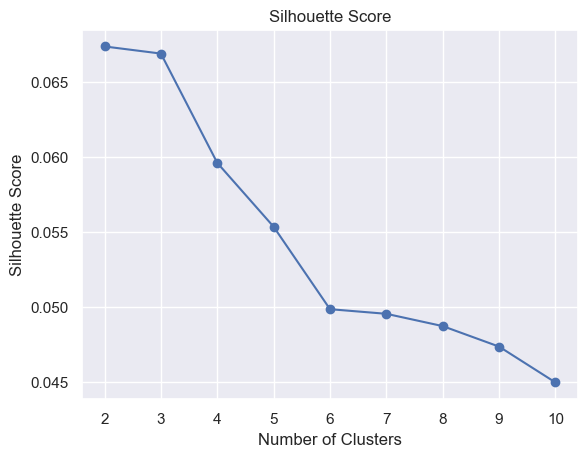

Optimal number of clusters: 2


In [76]:
# KMeans clustering

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
silhouette_scores = []
cluster_range = range(2, 11)  # Trying cluster numbers from 2 to 10

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    kmeans.fit(X_train)
    silhouette_scores.append(silhouette_score(X_train, kmeans.labels_))

# Plotting the Silhouette Score graph
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

# Find the optimal number of clusters with the maximum Silhouette Score
optimal_num_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print(f'Optimal number of clusters: {optimal_num_clusters}')

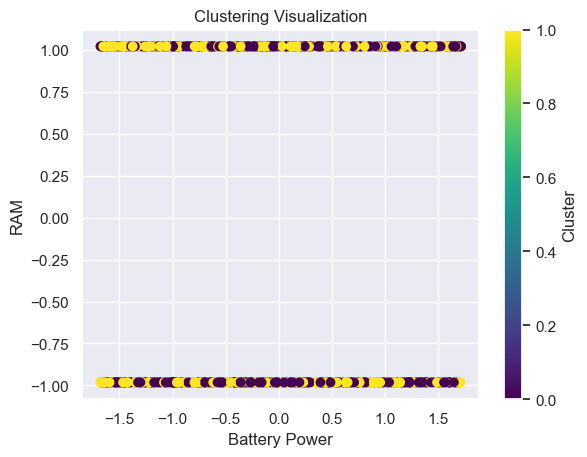

In [78]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)
cluster_labels = kmeans.labels_
plt.scatter(X_train[:, 0], X_train[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Battery Power')
plt.ylabel('RAM')
plt.title('Clustering Visualization')
plt.colorbar(label='Cluster')
plt.show()

In [87]:
silhouette_score = silhouette_score(X_train, cluster_labels)
print("Silhouette Score:", silhouette_score)

Silhouette Score: 0.0673856219124344


In [94]:
#PCA 

from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)

# Calculate explained variance ratio and cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Determine the number of components based on a threshold (e.g., 95% variance explained)
threshold = 0.95
n_components = np.argmax(cumulative_explained_variance >= threshold) + 1
print("Optimal number of components:", n_components)


Optimal number of components: 18


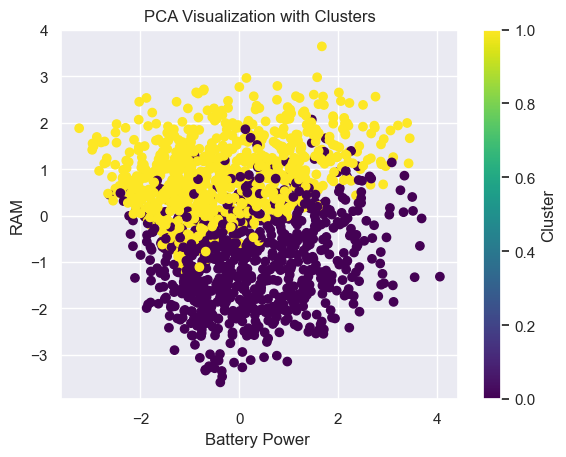

In [95]:
pca = PCA(n_components=18)
X_pca = pca.fit_transform(X_train)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Battery Power ')
plt.ylabel('RAM')
plt.title('PCA Visualization with Clusters')
plt.colorbar(label='Cluster')
plt.show()

In [97]:
pca_scores_df = pd.DataFrame(data=X_train_pca)
print(pca_scores_df.head()) 

         0         1         2         3         4         5         6   \
0  0.324537  0.559428  1.235869  0.519235  1.015638 -0.287868  1.067669   
1 -1.523101 -0.487580 -1.496000  0.416367 -0.197936  0.620724 -2.712189   
2 -0.345456  1.208450 -0.598620 -1.262237  0.796100  0.579821  1.443183   
3 -0.401007 -1.343770  1.336342 -1.021446  1.756644  0.168034  0.670369   
4  1.168688 -0.383929 -0.050757  0.853257 -0.095614  0.219580 -0.355216   

        7         8         9         10        11        12        13  \
0 0.325641  0.370710 -0.939498 -0.181395  2.049253 -0.118420  0.590357   
1 0.500453 -0.034203  0.683316  2.326117 -0.325356 -0.588715 -0.132473   
2 0.412836 -0.114309 -2.141222  1.770290  0.246659 -0.595546  1.362159   
3 0.229150 -0.542751  1.671302  1.538730 -0.455884 -0.272158  0.463432   
4 0.982861 -2.021255 -1.185527 -0.932560  0.031239 -0.502099  1.034175   

         14        15        16        17  
0 -1.545411 -1.895887 -1.392451  0.445957  
1  0.215125  0.4

For K Means Clustering, we have the found the optimal number of clusters required are 2, so ‘battery power’ and ‘RAM’ are considered since they provide corresponding positive correlation.A silhouette score of 0.067 indicates a relatively low level of separation and structure in the clusters identified by K Means clustering algorithm.For Principal Component Analysis algorithm, we have calculated the number of components as 18 and determined the PCA scores for each components.
